**Disclaimer:** If you intend to run any code in this notebook, it is **strongly recommended** to use Google Colab and ensure you are utilizing a GPU runtime, such as T4, to leverage CUDA capabilities (this applies to both free and paid versions). Unless you have access to dedicated GPUs or a highly powerful computer, please avoid waiting **hours** for some code segments to complete execution (for instance, I experienced a runtime of 1 hour, 1 minute, and 16 seconds for vectorization, as opposed to 4 minutes with the free GPU).


# AI Job Matching Model Case Study - Initial Plan

## 1. Understand the Problem
- **Goal**: Build an AI model that matches candidates with job postings by analyzing resumes and job descriptions.
- **Core Task**: Classify or rank job postings based on how well they match candidate resumes using Natural Language Processing (NLP) techniques.

---

## 2. Gather and Process Data
- **Data Sources**: Use the given 'nyc-jobs-1.csv'. If more data is needed, consider scraping public data or using published datasets.
- **Data Preprocessing**:
  - Tokenize text (break down sentences into individual words).
  - Remove stop words, with little information (e.g., "the", "is", "and").
  - Lemmatize words (convert words to their base forms).
  - Convert resumes and job descriptions into numerical vectors using techniques like **TF-IDF** (Term Frequency-Inverse Document Frequency) or **Word2Vec**.

---

## 3. Model Selection
- **NLP Techniques**:
  - Start simple with **TF-IDF** to represent text as numeric vectors.
  - Build basic models using:
    - **Logistic Regression** or **Random Forest** for classification.
    - **Cosine Similarity** for measuring text similarity (resume to job description).
  - Explore more advanced techniques, like using pre-trained models such as **BERT** to capture deeper semantic context from the text data.

---

## 4. Evaluate and Optimize
- **Performance Metrics**:
  - Use accuracy metrics like **precision**, **recall**, and **F1-score** to evaluate the model's effectiveness, if labels are available.
  - Apply **cross-validation** to ensure the model generalizes well to unseen data, if labels are available.
  - Graph these metrics for better understanding of performance, if labels are available.
- **Fine-tuning**:
  - Experiment with different vectorization methods (e.g., TF-IDF vs. Word2Vec).
  - Optimize the model's hyperparameters to improve accuracy.

---

## 5. Above and Beyond
- **Error Analysis**: Identify common mistakes or areas where the model struggles (e.g., ambiguous job descriptions, lack of sufficient data).
- **Future Improvements**: Suggest enhancements, such as using larger datasets, improving the preprocessing pipeline, or incorporating domain-specific knowledge.
- **Practicality**: Consider how the model could integrate into Hirehoot's platform, and propose potential real-world applications and benefits for job-candidate matching.

---


This plan showcases the initial plan for a relatively simple prototype for Hirehoot's more advanced model.


## 2. Gather and Process Data

In [1]:
from google.colab import files
import pandas as pd
import re

# Step 1: Uploading the raw data file
print('please upload "nyc-jobs-1.csv"')
uploaded = files.upload()

# Step 2: Loading the dataset
df = pd.read_csv('nyc-jobs-1.csv')

# Step 3: Specify and remove irrelevant columns
columns_to_remove = ['Job ID', 'Posting Type', '# Of Positions', 'Title Code No', 'Level',
                     'Salary Range From', 'Salary Range To', 'Salary Frequency',
                     'Additional Information', 'To Apply', 'Hours/Shift',
                     'Recruitment Contact', 'Posting Date', 'Post Until',
                     'Posting Updated', 'Process Date', 'Work Location 1']
df.drop(columns=columns_to_remove, inplace=True)

# Step 4: Remove rows with missing essential fields ('job_title' and 'job_description')
df.dropna(subset=['Business Title', 'Job Description'], inplace=True)

# Step 5: Define a text cleaning function
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Keep letters, numbers, and whitespace
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Step 6: Normalize entries
df['Job Description'] = df['Job Description'].apply(clean_text)
df['Business Title'] = df['Business Title'].str.replace('senior', 'sr.').str.replace('junior', 'jr.')
df['Preferred Skills'] = df['Preferred Skills'].str.lower()
df['Preferred Skills'] = df['Preferred Skills'].str.strip()
df['Preferred Skills'].fillna('Not Specified', inplace=True)
df.drop_duplicates(subset=['Preferred Skills'], inplace=True)
df['Full-Time/Part-Time indicator'] = df['Full-Time/Part-Time indicator'].str.strip().str.lower()
df['Full-Time/Part-Time indicator'] = df['Full-Time/Part-Time indicator'].replace({'full-time': 'full', 'part-time': 'part'})
df['Full-Time/Part-Time indicator'].fillna('Not Specified', inplace=True)
df['Job Category'] = df['Job Category'].str.strip().str.lower()
df['Job Category'].fillna('Not Specified', inplace=True)
df['Residency Requirement'].fillna('Not Specified', inplace=True)
df['Residency Requirement'] = df['Residency Requirement'].str.lower()
df['Residency Requirement'] = df['Residency Requirement'].str.strip()
df['Minimum Qual Requirements'].fillna('Not Specified', inplace=True)
df['Minimum Qual Requirements'] = df['Minimum Qual Requirements'].str.lower()  # Convert to lowercase
df['Minimum Qual Requirements'] = df['Minimum Qual Requirements'].str.strip()  # Remove leading/trailing whitespace

# Step 7: Double check for empty entries
print(df['Preferred Skills'].isna().sum())
print(df['Agency'].isna().sum())
print(df['Business Title'].isna().sum())
print(df['Civil Service Title'].isna().sum())
print(df['Job Category'].isna().sum())
print(df['Full-Time/Part-Time indicator'].isna().sum())
print(df['Work Location'].isna().sum())
print(df['Division/Work Unit'].isna().sum())
print(df['Minimum Qual Requirements'].isna().sum())
print(df['Job Description'].isna().sum())
print(df['Residency Requirement'].isna().sum())


# Step 8: Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_job_postings.csv', index=False)

# Step 9: Preview of cleaned dataset
df.head(100)

please upload "nyc-jobs-1.csv"


Saving nyc-jobs-1.csv to nyc-jobs-1.csv


<ipython-input-1-8b31fc07668d>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Preferred Skills'].fillna('Not Specified', inplace=True)
<ipython-input-1-8b31fc07668d>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

0
0
0
0
0
0
0
0
0
0
0


,Agency,Business Title,Civil Service Title,Job Category,Full-Time/Part-Time indicator,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Residency Requirement
0,DEPARTMENT OF BUSINESS SERV.,Account Manager,CONTRACT REVIEWER (OFFICE OF L,,,110 William St. N Y,Strategy & Analytics,division of economic financial opportunity def...,1.\ta baccalaureate degree from an accredited ...,â€¢\texcellent interpersonal and organizationa...,new york city residency is generally required ...
1,DEPARTMENT OF BUSINESS SERV.,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,,f,110 William St. N Y,Tech Talent Pipeline,the new york city department of small business...,1. a baccalaureate degree from an accredited c...,,new york city residency is generally required ...
5,TAXI & LIMOUSINE COMMISSION,Sharepoint Developer,COMPUTER SPECIALIST (SOFTWARE),"technology, data & innovation",f,"33 Beaver St, New York Ny",Management Information Systems,the new york city taxi and limousine commissio...,(1) a baccalaureate degree from an accredited ...,â€¢\tstrong analytical and problem solving ski...,new york city residency is not required for th...
8,DEPT OF ENVIRONMENT PROTECTION,"Director, Strategic Sourcing",ADMINISTRATIVE PROJECT MANAGER,"finance, accounting, & procurement",f,59-17 Junction Blvd Corona Ny,Executive Management,the nyc department of environmental protection...,1. a baccalaureate degree from an accredited c...,- an mba or other graduate degree potentially...,new york city residency is not required for th...
10,DEPT OF INFO TECH & TELECOMM,Network Engineer,TELECOMMUNICATIONS ASSOCIATE (,"technology, data & innovation",,2 Metro Tech,IT Svcs Delivery,doitt provides for the sustained efficient and...,1. a baccalaureate degree from an accredited c...,the preferred candidate should possess the fol...,new york city residency is generally required ...
...,...,...,...,...,...,...,...,...,...,...,...
194,DEPT OF INFO TECH & TELECOMM,Integration Support Engineer,COMPUTER SPECIALIST (OPERATION,information technology & telecommunications,,2 Metro Tech,Enterprise APP Services,doitt provides for the sustained efficient and...,(1) a four-year high school diploma or its edu...,the preferred candidate should possess the fol...,new york city residency is not required for th...
196,ADMIN FOR CHILDREN'S SVCS,APA Foster Care Program Evaluator,PROGRAM EVALUATOR (ACS),policy & analysis social services,f,"150 William Street, New York N",Agency Program Assistance(Qa),the agency program assistance apa unit is resp...,1. a masterâ€™s degree from an accredited coll...,the preferred candidate should possess the fol...,new york city residency is generally required ...
198,ADMIN FOR CHILDREN'S SVCS,Child Welfare Trainer,COMMUNITY COORDINATOR,community & business services social services,f,"492 First Avenue, New York, Ny",Satterwhite Academy (Qa),reporting to the training supervisor the train...,1. a baccalaureate degree from an accredited c...,the preferred candidate should possess knowled...,new york city residency is generally required ...
199,POLICE DEPARTMENT,Civilian Investigator,INVESTIGATOR,"public safety, inspections, & enforcement",f,"1 Police Plaza, N.Y.",Personnel Bureau/Civ & Cad,the new civilian investigation unit in the nyp...,1. a four-year high school diploma or its educ...,all candidates must hold a civil service title...,new york city residency is generally required ...


The above will upload the csv and clean the data to contain only relevant features for job matching

In [2]:
!pip install -U sentence-transformers
!pip install fitz
# dependencies for later

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.8 MB/s eta 0:00:00
  Created wheel for configobj: filename=configobj-5.0.9-py2.py3-none-any.whl size=35615 sha256=4a45f8a76585d34a0414dbbf281a10ce7e9b2312d64cf8baa3d7633

In [3]:
!pip install nltk
!pip install PyMuPDF
# also needed later

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 42.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required nltk resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset again (if needed)
df = pd.read_csv('cleaned_job_postings.csv')

# Initialize stop words and our lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Specify the columns to be preprocessed (all the remaining ones)
text_columns = [
    'Preferred Skills', 'Agency', 'Business Title', 'Civil Service Title',
    'Job Category', 'Full-Time/Part-Time indicator', 'Work Location',
    'Division/Work Unit', 'Minimum Qual Requirements', 'Job Description',
    'Residency Requirement'
]

# Preprocessing function
def preprocess_text(text):
    # Check for NaN values and return if empty
    if pd.isna(text):
        return ""
    # Tokenize, remove stop words, and apply lemmatization
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.isalnum()]
    return " ".join(tokens)

# Apply preprocessing
for column in text_columns:
    df[column] = df[column].apply(preprocess_text)

df.to_csv('processed_job_postings.csv', index=False)

# Display the first few rows
print(df.head(20))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                         Agency  \
0      department business serv   
1      department business serv   
2     taxi limousine commission   
3   dept environment protection   
4       dept info tech telecomm   
5                law department   
6   dept environment protection   
7   dept environment protection   
8         nyc housing authority   
9   nyc employee retirement sys   
10  dept environment protection   
11                 dept hygiene   
12  dept environment protection   
13  dept environment protection   
14  dept environment protection   
15  dept environment protection   
16        nyc housing authority   
17  dept environment protection   
18        nyc housing authority   
19  dept environment protection   

                                       Business Title  \
0                                     account manager   
1             executive director business development   
2                                sharepoint developer   
3                         director s

The above completes the processing as outliend in the "preprocessing" step of the task document

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load your dataset (if needed)
# df = pd.read_csv('processed_job_postings.csv')

# Columns to combine (all the remaining ones)
text_columns = [
    'Preferred Skills', 'Agency', 'Business Title', 'Civil Service Title',
    'Job Category', 'Full-Time/Part-Time indicator', 'Work Location',
    'Division/Work Unit', 'Minimum Qual Requirements', 'Job Description',
    'Residency Requirement'
]

# Combine text
df['combined_text'] = df[text_columns].fillna('').agg(' '.join, axis=1)

# Apply TF-IDF
tfidf_vectorizer = TfidfVectorizer()
posting_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])

# The result is a matrix of TF-IDF values
print(posting_matrix.shape)


(1338, 11962)


The above has turned our job postings into a matrix of TF-IDF values. We can use this matrix to calculate cosine similarity values.

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import fitz  # PyMuPDF
from google.colab import files

# Download necessary nltk resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Upload PDF file
print()
print('please upload a resume. You may want to upload "resume.pdf", to allign with the comments below')
print()
uploaded = files.upload()

# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Read PDF and convert to text
def pdf_to_text(file_path):
    text = ""
    with fitz.open(file_path) as pdf:
        for page_num in range(pdf.page_count):
            page = pdf[page_num]
            text += page.get_text("text")
    return text

# Preprocess the text data
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.isalnum()]
    return " ".join(tokens)

# Process each uploaded PDF
for file_name in uploaded.keys():
    raw_text = pdf_to_text(file_name)
    processed_text = preprocess_text(raw_text)

    # Apply TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    resume_matrix = tfidf_vectorizer.fit_transform([processed_text])

    # Display the TF-IDF matrix shape
    print(resume_matrix.shape)



please upload a resume. You may want to upload "resume.pdf", to allign with the comments below



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Saving resume.pdf to resume.pdf
(1, 483)


Now the resume is in a numerical form, with usage of TF-IDF. Time to rank the postings. But first, the representations must have the same length (for cosine similarity)

In [7]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assume `resume_vector` and `job_postings_matrix` are your existing vectors
resume_vector = resume_matrix
job_postings_matrix = posting_matrix

# Apply PCA to reduce job postings matrix to match the dimensionality of resume vector (483)
pca = PCA(n_components=483)
job_postings_reduced = pca.fit_transform(job_postings_matrix)

# Compute cosine similarity
similarities = cosine_similarity(resume_vector, job_postings_reduced)

# Find the top matches
top_matches_indices = similarities.argsort()[0, ::-1][:10]  # Top 10 job postings
top_matches_scores = similarities[0, top_matches_indices]

df = pd.read_csv('processed_job_postings.csv')

# Filter the DataFrame for the specified indices
filtered_df = df[df.index.isin(top_matches_indices)]


# Output
for idx, score in zip(top_matches_indices, top_matches_scores):
    print(f"Job Posting Index: {idx}, Similarity Score: {score}")
    posting_details = filtered_df.loc[idx]
    print(posting_details)


Job Posting Index: 1004, Similarity Score: 0.16604682875394508
Agency                                                            department aging
Business Title                                                 principal nutrition
Civil Service Title                                 principal nutrition consultant
Job Category                                                                health
Full-Time/Part-Time indicator                                                    f
Work Location                                                          2 lafayette
Division/Work Unit                                                       nutrition
Job Description                  administrative direction coordinate activity s...
Minimum Qual Requirements        qualification requirement baccalaureate degree...
Preferred Skills                 registered dietitian certified dietitian nutri...
Residency Requirement            new york city residency generally required wit...
Name: 1004, dtype: objec

The above code succesfully gave us a starting ranking for some resume - however, it is apparent that it did a terrible job. "resume.pdf" was a 4 page, detailed record of experiences as a database administrator, but we are getting top rankings related to sectors such as 'gardening', 'law', and 'health'. When I thought it couldn't get worse, I noticed the low similarity values. We can do much better...

Upon reflection on the weaknesses of the above strategy (TF-IDF on job postings, TF-IDF on resume, and apply cosine similarity), I realised that there are three main problems.

- 1: transforming the postings and resumes into a numerical form that actualy represents the original text **holistically** and in **context**
- 2: turning arbitrary resume pdf inputs into manageable and related chunks, for vectorisation to happen efficiently
- 3: finding an acurate way to compare numerical postings and resumes (so testing other methods if cosine-similarity doesn't perform well)

At this point in time, having started working with the data and considered my options, I revised my initial plan to the below.

# AI Job Matching Model Case Study - Revised Plan

## 1. Understand the Problem
- **Goal**: Build an AI model that matches candidates with job postings by analyzing resumes and job descriptions.
- **Core Task**: Classify or rank job postings based on how well they match candidate resumes using Natural Language Processing (NLP) techniques.

---

## 2. Gather and Process Data
- **Data Sources**: Use the given 'nyc-jobs-1.csv'. If more data is needed, consider using published datasets.
- **Data Preprocessing**:
  - Clean the data - normalise, drop irrelevant columns, format to be lowercase, etc.
  - Tokenize text (break down sentences into individual words).
  - Remove stop words, with little information (e.g., "the", "is", "and").
  - Lemmatize words (convert words to their base forms).
  - Convert resumes and job descriptions into numerical vectors using an **SBERT** model (**all-MiniLM-L6-v2**). All the above, after cleaning, is handled by SBERT models.

---

## 3. Model Selection
- **NLP Techniques**:
  - Start with **SBERT** to represent text as dense numeric vectors.
  - Build basic models using:
    - **Cosine Similarity** for measuring text similarity (resume to job description).
  - Explore more advanced techniques, like using **generator-based models** to capture deeper semantic context from the text data.

---

## 4. Evaluate and Optimize
- **Performance Metrics**:
  - Manually create a few labels, for demonstration purposes, and to showcase the performance of the different models.
  - Generate some useful visuals.
- **Fine-tuning**:
  - Experiment with different vectorization methods (e.g., SBERT vs BERT vs Word2Vec, etc).
  - Optimize the model's hyperparameters to improve accuracy.

---

## 5. Above and Beyond
- **Error Analysis**: Identify common mistakes or areas where the model struggles (e.g., ambiguous job descriptions, lack of sufficient data).
- **Future Improvements**: Suggest enhancements, such as using larger datasets, improving the preprocessing pipeline, or using different techniques.
- **Practicality**: Consider how the model could integrate into Hirehoot's platform, and propose potential real-world applications and benefits for job-candidate matching.
- **Train Model**: Get a hold of quality data and train / fine tune a model to recognise key components of a resume:

---


This is the revised plan that I will try to follow, until the plan is otherwise restated.



## 2. Gather and Process Data

In [8]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Step 1: Load the cleaned dataset
df = pd.read_csv('cleaned_job_postings.csv')  # Uncomment if loading a saved dataset

# Step 2: Load pre-trained SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Step 3: Create embeddings for each specified column
columns_to_embed = [
    'Agency',
    'Business Title',
    'Civil Service Title',
    'Job Category',
    'Full-Time/Part-Time indicator',
    'Work Location',
    'Division/Work Unit',
    'Job Description',
    'Minimum Qual Requirements',
    'Preferred Skills',
    'Residency Requirement'
]

# Step 4: Generate SBERT embeddings for each specified column
for column in columns_to_embed:
    df[f'{column}_embeddings'] = df[column].fillna('').apply(lambda x: model.encode(x))

# Step 5: Combine individual embeddings into a super embedding
def combine_embeddings(row):
    # Extract embeddings for all specified columns
    embeddings = [row[f'{column}_embeddings'] for column in columns_to_embed]

    # Stack the embeddings into a single array
    combined = np.vstack(embeddings)

    # Compute the mean of the combined embeddings
    super_embedding = np.mean(combined, axis=0)  # Averages the embeddings along the first axis
    return super_embedding

# Step 6: Create the super embedding for each row
df['super_embedding'] = df.apply(combine_embeddings, axis=1)

# Example of accessing the super embeddings
# print(df[['super_embedding']].head())

# Step 7: Save the embeddings to a file for future use
df.to_csv('job_postings_with_super_embeddings.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

The above code uses a pre-trained SBERT model, which is designed with sentence inputs in mind (so especially accurate for our needs, compared to regular BERT). It turns related fields into single 'contextual embeddings' - these outputs represent the meaning of words in the context of surrounding words, hence the name. This also makes these representations superior to normal embeddings.

The particular model used above, all-MiniLM-L6-v2, takes sentences and outputs dense, vectorised versions of the sentences.

The above code produces a large file, with almost **half a gb** of data. Thence, it **must** be run, if you plan on interracting with this notebook later on. The large file size prevents me from just including it in the project files.

In [ ]:
'''
from google.colab import files
# files.download('job_postings_with_super_embeddings.csv')

# This code is for convenience, so that I don't have to wait 10 minutes for the job descriptions to be vectorised, and can work locally.
# However, when you, the reader, want to interact with this notebook, you will have to either download the embeddings, or run
# the vectorisation proccess above, both of which probably will take around 10 minutes. Practically, these job postings would be pre vectorised in
# a backend / cloud server, so an end user won't have to wait for vectorisation or downloading of this csv.
'''

In [9]:
!pip install PyMuPDF
!pip install datasets
# needed later

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.1 MB/s eta 0:00:00


In [10]:
import pandas as pd

# Load the cleaned job postings
cleaned_job_postings = pd.read_csv('cleaned_job_postings.csv')

# Load the job postings with super embeddings
job_postings_with_embeddings = pd.read_csv('job_postings_with_super_embeddings.csv')

# Perform the merge, ensuring only the 'super_embedding' column is included
merged_data = pd.merge(
    cleaned_job_postings,
    job_postings_with_embeddings[['Agency', 'super_embedding']],  # Select only relevant columns
    on='Agency',  # This should be the actual common column name
    how='left'   # Change to 'inner' if you only want matching entries
)

# Display the first few rows of the merged DataFrame
print("Merged Data with only 'super_embedding':")
print(merged_data.head())


Merged Data with only 'super_embedding':
                         Agency   Business Title  \
0  DEPARTMENT OF BUSINESS SERV.  Account Manager   
1  DEPARTMENT OF BUSINESS SERV.  Account Manager   
2  DEPARTMENT OF BUSINESS SERV.  Account Manager   
3  DEPARTMENT OF BUSINESS SERV.  Account Manager   
4  DEPARTMENT OF BUSINESS SERV.  Account Manager   

              Civil Service Title Job Category Full-Time/Part-Time indicator  \
0  CONTRACT REVIEWER (OFFICE OF L          NaN                           NaN   
1  CONTRACT REVIEWER (OFFICE OF L          NaN                           NaN   
2  CONTRACT REVIEWER (OFFICE OF L          NaN                           NaN   
3  CONTRACT REVIEWER (OFFICE OF L          NaN                           NaN   
4  CONTRACT REVIEWER (OFFICE OF L          NaN                           NaN   

         Work Location    Division/Work Unit  \
0  110 William St. N Y  Strategy & Analytics   
1  110 William St. N Y  Strategy & Analytics   
2  110 William St. N 

The above code combines the embeddings with the original job postings, including our **super embedding**. This is just the mean of all the other embeddings.

## 3. Model Selection

In [11]:
import ast
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Example of a lightweight SBERT model

# A pretty good chunking of the example resume given for this case study
brokenResume = [
    'Oracle Certified Associate PL/SQL Developer',
    'Oracle Certified - 12c SQL fundamentals. Oracle Certified - 11g Program with PL/SQL.',
    'Languages: SQL, PL/SQL, T-SQL, UNIX Shell Script. Scripts/Web Technologies: HTML, PHP, Java. Databases: Oracle 11g, 12C, MS SQL SERVER 2005/2008. Tools & Utilities: TOAD, SQL Developer, SQL*PLUS, Informatica, ADDM, AWR, Github, Bamboo, Jenkins. OS: Windows XP/10, Linux.',
    'Chicago State University, Chicago, IL. Aug 2015-May 2017 Master of Science: Computer Science. JNTU, Hyderabad, Telangana. Aug 2009-May 2013 Bachelors of Technology: Electrical and Electronics Engineering.',
    'I worked as an Oracle PL/SQL Developer at Mastercard in O’Fallon, Missouri, from July 17 to the present. My primary project is Smartdata, which aligns with the General Data Protection Regulation (EU) (GDPR) concerning data protection and privacy for individuals within the EU and the EEA. My responsibilities included creating PL/SQL stored procedures, triggers, and packages, along with developing scripts for purging data. I designed cursors, collections, and database triggers to maintain complex integrity constraints and implement intricate business rules. Additionally, I developed SQL scripts for creating database objects like tables, views, and sequences, and I implemented SQL*Loader and UNIX scripts for loading external data into Oracle database tables. I utilized Oracle Data Pump (expdp and impdp) for high-speed, parallel, bulk data movement, and applied hints to guide the optimizer toward optimal query execution plans. I was involved in preparing test scenarios and performing unit tests on PL/SQL programs while leveraging Atlassian products such as BitBucket, JIRA, Confluence, SourceTree, and Bamboo. My experience encompasses all phases of the Software Development Life Cycle (SDLC), including requirement gathering, analysis, development, testing, implementation, and support. I also have extensive experience in data migration techniques using external tables, import/export processes, SQL*Loader, and bulk/batch processing. I validated and loaded data into Oracle Database using DB links and external tables from CSV files, collaborating in an Agile environment where I participated in daily scrums and sprints using Rally. Moreover, I worked with the DevOps team on Flyway migration in various Dev and staging environments, resolving complex issues during migration. I have hands-on experience in writing, maintaining, testing, and debugging code in relevant programming languages, and I implemented PL/SQL scripts according to necessary business rules and procedures. Throughout my career, I have actively participated in requirement gathering and problem-solving with different teams across countries. The technologies I worked with include Oracle 12c, TOAD, SQL Developer, MS Excel, GitHub, Jenkins, Bamboo, and UNIX.',
    'I worked as an Oracle PL/SQL Developer at Mphasis Corporation in New York from December 2016 to June 2017, contributing to the Connect Risk Engine Genesis project. This risk engine focuses on small business-level insurance, handling property, vehicle, shipping, and transportation insurance. Our module calculates compensation for customers who lose or damage their products or properties due to man-made mistakes or natural disasters. We developed a system that logically calculates premiums based on business rules, differentiating between benchmark and manual premiums. Manual premiums are determined in an application called TAP, while the premiums derived from the Risk Engine Interim Application are assigned to benchmark premiums. The resultant score from this process determines the damage and tier factors, which in turn influence the calculated premium. My responsibilities included creating PL/SQL stored procedures, functions, and packages to facilitate the auto-renewal of quotes. I wrote scripts to create new tables, views, and queries for application enhancements using SQL Developer, and created indexes on tables to enhance database performance through faster data retrieval. I employed bulk collections to improve performance and reduce context switching between SQL and PL/SQL engines, and developed records, tables, and collections (including nested tables and associative arrays) to enhance query performance. Additionally, I participated in optimizing database performance by analyzing database objects, creating indexes, and establishing materialized views. I was involved in system analysis and data modeling, which included creating tables, views, indexes, synonyms, and packages while utilizing advanced concepts such as records, collections, and dynamic SQL. My role also included performance testing, user acceptance testing of the application, and participation in code and design reviews, status meetings, and walkthroughs. Furthermore, I utilized UTL_FILE to load data into Oracle tables from flat files, CSV files, and text files. The technologies I worked with included Oracle 11g, SQL Server, TOAD, SQL Developer, XML Publisher, shell scripts, MS Access, GIT, and UNIX.',
    'As an Oracle PL/SQL Developer at CNA Financial Corp in Chicago, IL, from December 2015 to November 2016, I gained extensive experience in Oracle SQL and PL/SQL, working with various database objects such as stored procedures, functions, packages, TYPE objects, cursors, REF cursors, parameterized cursors, views, materialized views, and PL/SQL collections. I designed an ER diagram using Visio to establish logical and physical relationships within the database. My role involved designing and developing complex mappings using Informatica, employing transformations like Lookup, Expression, Update, Sequence Generator, Aggregator, Router, and Stored Procedure to implement intricate business logic in mapping code. I wrote sequences for the automatic generation of unique keys to support primary and foreign key constraints during data conversions and implemented data integrity validation checks through constraints and triggers. Additionally, I worked on SQL reports and scheduled these reports using UNIX scripts, while developing shell scripts to automate job scheduling for various database-related program executions, including SQL and PL/SQL scripts and data loading processes. I created PL/SQL functions, procedures, and packages to support reporting needs, validating data integration by developing and executing comprehensive test plans that encompassed data design, test design, networks, and hardware. My responsibilities also included developing program units for debugging, testing PL/SQL code, and managing daily report validations. I created SQL*Loader control files to facilitate the movement of data from flat files to staging area tables and was involved in a migration project that loaded data from mainframe systems into the Oracle database. Furthermore, I utilized shell scripting for hosting concurrent programs and migration scripts during deployment, and I undertook code optimization and performance tuning of the application. The technologies I worked with included Oracle 11g, TOAD, XML Publisher, shell scripts, Reports 10g, MS Access, MS Office, and UNIX.',
    'As an Oracle PL/SQL Developer at Vectran Corporation in Hyderabad, India, from April 2013 to August 2015, I coordinated with the front-end design team to provide necessary stored procedures and packages, offering insights into data requirements. I was involved in writing both DDL and DML operations and worked closely with the functional team to understand their development-related needs. My responsibilities included writing complex SQL queries utilizing inner and outer joins, union all, intersect, and minus set operators. I created table structures alongside triggers and indexes, such as bitmap and function-based indexes, and developed collections for accessing and storing complex data resulting from the joining of multiple tables. I implemented database triggers to maintain a history of insertions, updates, deletions, and audits. I optimized critical queries to eliminate full table scans, thereby reducing disk I/O and sorts, and utilized extensive exception handling to manage errors, facilitating easier debugging and clearer error message displays within applications. Additionally, I created partitioned tables and indexes to enhance application performance and worked with SQL*Loader to load data from flat files obtained from various facilities daily. I also utilized standard packages like UTL_FILE, DBMS_SQL, and PL/SQL collections, employing bulk binding while writing database procedures, functions, and packages for the front-end module. Throughout my tenure, I was extensively involved in preparing detailed technical documents based on functional specifications. My work environment included Oracle 11g, SQL Developer, SQL*Plus, TOAD, and UNIX shell scripts.'
]

'''
# Merely exists for reference, so I can chunk the above better
columns_to_embed = [
    'Agency',
    'Business Title',
    'Civil Service Title',
    'Job Category',
    'Full-Time/Part-Time indicator',
    'Work Location',
    'Division/Work Unit',
    'Job Description',
    'Minimum Qual Requirements',
    'Preferred Skills',
    'Residency Requirement'
]
'''

# Step 1: Create embeddings for each chunk in the resume
resume_embeddings = model.encode(brokenResume)

print(f"Resume embeddings shape: {resume_embeddings.shape}")

# Step 2: Read the CSV file
csv_file = "job_postings_with_super_embeddings.csv"
df = pd.read_csv(csv_file)

# Step 3: Access the super embedding column (which is a string of list format)
super_embeddings = df['super_embedding']

# Step 4: Convert the string of embeddings to a list of floats for each row
def parse_embedding(embedding_str):
    # Strip the square brackets and convert the string to a NumPy array
    return np.fromstring(embedding_str.strip('[]'), sep=' ')

# Apply the function to the super_embedding column
df['super_embedding'] = df['super_embedding'].apply(parse_embedding)

# Step 5: Compute the average of the resume embeddings
average_resume_embedding = np.mean(resume_embeddings, axis=0)

# Function to truncate the longer vector
def truncate_to_shorter(vector1, vector2):
    # Check if either vector is None
    if vector1 is None or vector2 is None:
        print(f"One of the vectors is None: vector1={vector1}, vector2={vector2}")
        return None, None  # Or handle this case differently based on your requirements

    # Determine which vector is longer and truncate it
    if len(vector1) > len(vector2):
        return vector1[:len(vector2)], vector2  # Truncate vector1
    else:
        return vector1, vector2[:len(vector1)]  # Truncate vector2

# Step 6: Initialize a list to store cosine similarities
cosine_similarities = []

# Step 7: Iterate through the DataFrame and compute cosine similarities
for index, row in df.iterrows():
    job_vector = row['super_embedding']
    # Truncate to the shorter vector
    truncated_resume, truncated_job = truncate_to_shorter(average_resume_embedding, job_vector)
    if truncated_resume is not None and truncated_job is not None:
        # Compute cosine similarity
        similarity = cosine_similarity([truncated_resume], [truncated_job]).flatten()[0]
        cosine_similarities.append(similarity)

# Debugging: Check for None values in cosine similarities
none_similarities = cosine_similarities.count(None)
print(f"Number of None values in cosine similarities: {none_similarities}")

# Step 8: Add the cosine similarities to the DataFrame
df['Cosine_Similarity'] = cosine_similarities

# Step 9: Rank the jobs by cosine similarity and select the top 5
top_5_jobs = df.nlargest(5, 'Cosine_Similarity')

# Display the top 5 matching jobs (customize based on the CSV structure)
print(top_5_jobs[['Agency', 'Business Title', 'Job Description', 'Cosine_Similarity']])

print("Top 5 Jobs by Cosine Similarity:")
print(df[df['Cosine_Similarity'].isin(top_5_jobs['Cosine_Similarity'])])

print("#=====================================================#")
print("#                                                     #")
print("#=====================================================#")
print("#                                                     #")
print("#=====================================================#")
print("#                                                     #")
print("#=====================================================#")
print("#                                                     #")
print("#=====================================================#")

# Function to reduce the longer vector using PCA to match the length of the shorter vector
def reduce_to_shorter_with_pca(vector1, vector2):
    """
    Reduces the longer vector to the length of the shorter vector using PCA,
    keeping the input and output structure consistent.
    """
    # Check if either vector is None
    if vector1 is None or vector2 is None:
        print(f"One of the vectors is None: vector1={vector1}, vector2={vector2}")
        return None, None  # Handle this case as needed

    # Determine which vector is longer and apply PCA to match dimensions
    if len(vector1) > len(vector2):
        pca = PCA(n_components=len(vector2))
        vector1_reduced = pca.fit_transform(vector1.reshape(1, -1)).flatten()
        return vector1_reduced, vector2
    elif len(vector2) > len(vector1):
        pca = PCA(n_components=len(vector1))
        vector2_reduced = pca.fit_transform(vector2.reshape(1, -1)).flatten()
        return vector1, vector2_reduced
    else:
        return vector1, vector2  # If they are already the same length


# Step 10: Repeat from Step 6 above, to test PCA shortening vs Truncation
cosine_similarities = []

# Step 11: Iterate through the DataFrame and compute cosine similarities
for index, row in df.iterrows():
    job_vector = row['super_embedding']
    # Use PCA to reduce the longer vector to match the length of the shorter vector
    reduced_resume, reduced_job = reduce_to_shorter_with_pca(average_resume_embedding, job_vector)
    if reduced_resume is not None and reduced_job is not None:
        # Compute cosine similarity
        similarity = cosine_similarity([reduced_resume], [reduced_job]).flatten()[0]
        cosine_similarities.append(similarity)

# Debugging: Check for None values in cosine similarities
none_similarities = cosine_similarities.count(None)
print(f"Number of None values in cosine similarities: {none_similarities}")

# Step 12: Add the cosine similarities to the DataFrame
df['Cosine_Similarity'] = cosine_similarities

# Step 13: Rank the jobs by cosine similarity and select the top 5
top_5_jobs = df.nlargest(5, 'Cosine_Similarity')

# Display the top 5 matching jobs (customize based on the CSV structure)
print(top_5_jobs[['Agency', 'Business Title', 'Job Description', 'Cosine_Similarity']])

print("Top 5 Jobs by Cosine Similarity:")
print(df[df['Cosine_Similarity'].isin(top_5_jobs['Cosine_Similarity'])])

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Resume embeddings shape: (8, 384)
Number of None values in cosine similarities: 0
                             Agency                     Business Title  \
640    DEPT OF INFO TECH & TELECOMM                       DBA Engineer   
129    DEPT OF INFO TECH & TELECOMM  SQL/Oracle Database Administrator   
946  HOUSING PRESERVATION & DVLPMNT             Database Administrator   
906  HOUSING PRESERVATION & DVLPMNT         Data Modeler/ETL Developer   
800        DEPARTMENT OF SANITATION                 Database Developer   

                                       Job Description  Cosine_Similarity  
640  doitt provides for the sustained efficient and...           0.577032  
129  doitt provides for the sustained efficient and...           0.555887  
946  hpd is seeking a sql database administrator th...           0.554316  
906  hpd tech is the it division within hpd hpd tec...           0.554027  
800  the bureau of information technology bit is re...           0.538066  
Top 5 Jobs by Cos

The above was just a simple test to see if cosine similarity is even a good similarity test. From the results, it is clear that it is a promising way to rank! This is because, the angle between two vectors only changes significantly, when the length along a dimension changes significantly. So, for a resume and posting that are similar, the cosine similarity function returns a value close to 1, and close to 0 for unrelated vectors.

Almost all the jobs recomended are in IT, and one of them is even as an Oracle administrator (a direct skill match). Further, this was more than 3 times faster than the original ranker.

## 4. Evaluate and Optimize

The results above are very promising! Now, we need an intelligent, automated way to chunk resumes. This is arguably, the crux of this entire task, and the most challenging part too. Chunking resumes into sections that are **related** can have a big impact on the similarity scores, as then we are leveraging the full power of **SBERT** and **contextual embeddings**.

**Idea 1**

Just apply a simple chunking algorithm, that splits via new lines, and if needed, iteratively/recursively halfs big chunks as required.

**Idea 2**

Use a NLP model such as GPT-2 to process large parts of the resume and return summarised sections

**Idea 3**

Build a standalone CNN model, fine tune a BigBird model, or build a CNN model on top of BigBird (all of which require **labelled data**).



**IDEA 1:**

In [12]:
!pip install PyPDF2
# needed below and later

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.3 MB/s eta 0:00:00


please upload a resume


Saving resume(1).pdf to resume(1) (14).pdf


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Resume embeddings shape: (99, 384)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


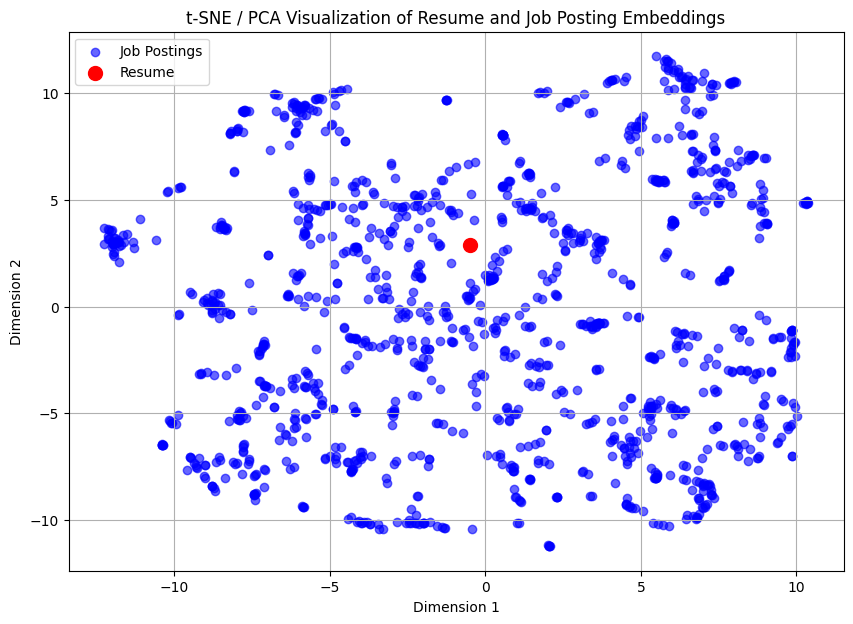

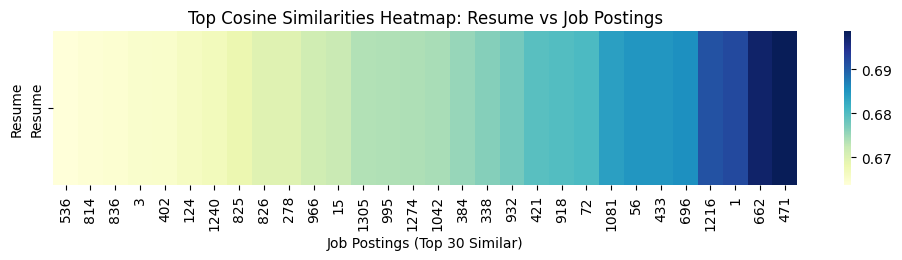

Number of None values in cosine similarities: 0
                             Agency                Business Title  \
470    DEPARTMENT OF BUSINESS SERV.  EXECUTIVE DIRECTOR, TRAINING   
661     TAXI & LIMOUSINE COMMISSION   Data and Operations Analyst   
0      DEPARTMENT OF BUSINESS SERV.               Account Manager   
1215               CONSUMER AFFAIRS               Program Officer   
695   OFFICE OF MANAGEMENT & BUDGET                    EDUCATION    

                                        Job Description  Cosine_Similarity  
470   sbs workforce development division is dedicate...           0.698626  
661   the new york city taxi and limousine commissio...           0.697388  
0     division of economic financial opportunity def...           0.691943  
1215  the nyc department of consumer affairs dca pro...           0.691010  
695                                      education mgrl           0.685565  
Top 5 Jobs by Cosine Similarity:
                             Agency       

Saving Resume(2).pdf to Resume(2) (5).pdf


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Resume embeddings shape: (79, 384)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


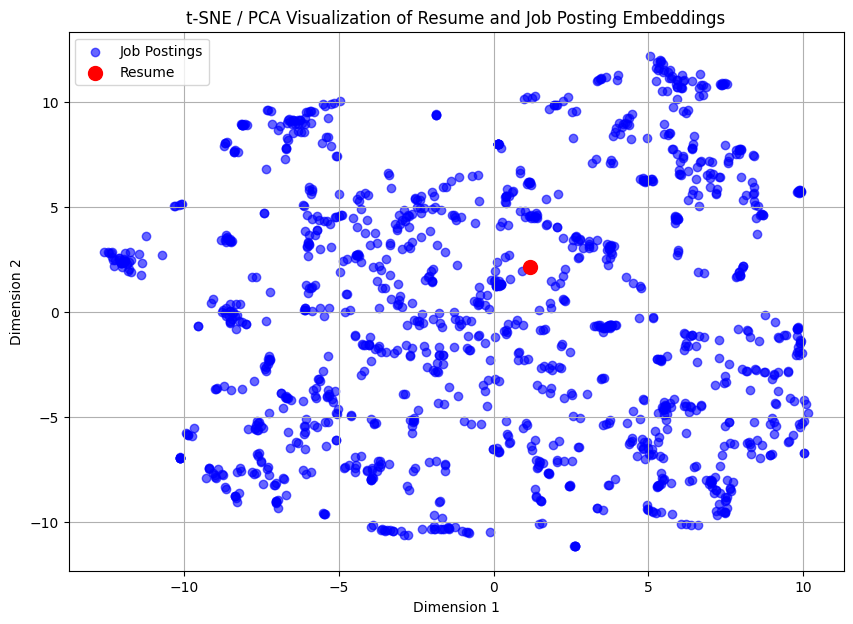

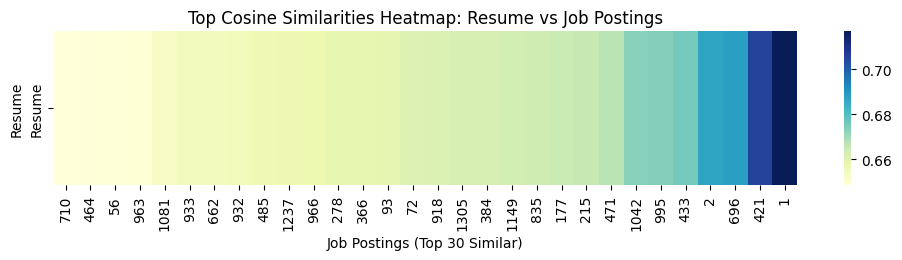

Number of None values in cosine similarities: 0
                             Agency                            Business Title  \
0      DEPARTMENT OF BUSINESS SERV.                           Account Manager   
420    DEPT OF INFO TECH & TELECOMM              Workforce Management Analyst   
695   OFFICE OF MANAGEMENT & BUDGET                                EDUCATION    
1      DEPARTMENT OF BUSINESS SERV.  EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT   
432  MAYORS OFFICE OF CONTRACT SVCS              Analyst, Learning Management   

                                       Job Description  Cosine_Similarity  
0    division of economic financial opportunity def...           0.716872  
420  doitt provides for the sustained efficient and...           0.705084  
695                                     education mgrl           0.687710  
1    the new york city department of small business...           0.687140  
432  the mayors office of contract services mocs ov...           0.675411  
Top 5 Job

Saving Resume(3).pdf to Resume(3) (4).pdf


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Resume embeddings shape: (94, 384)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


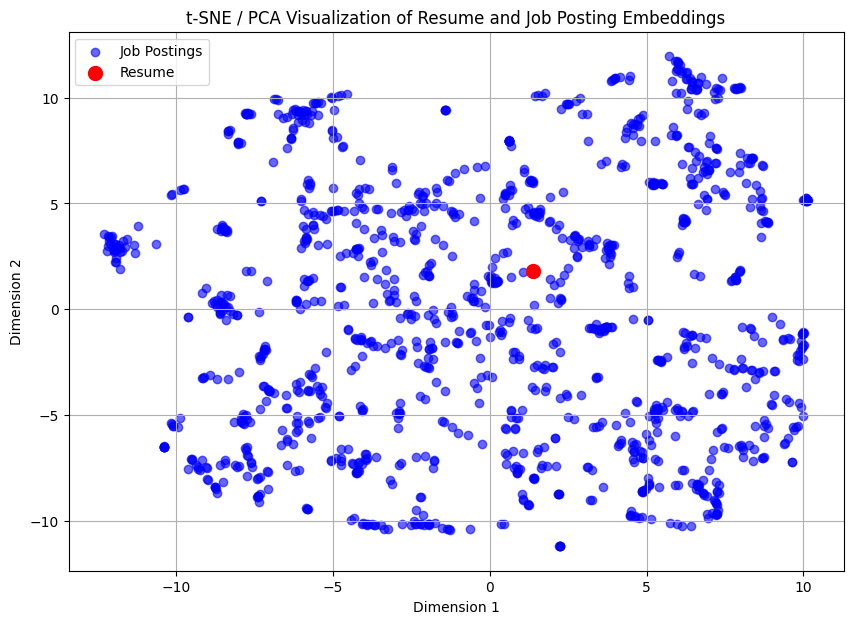

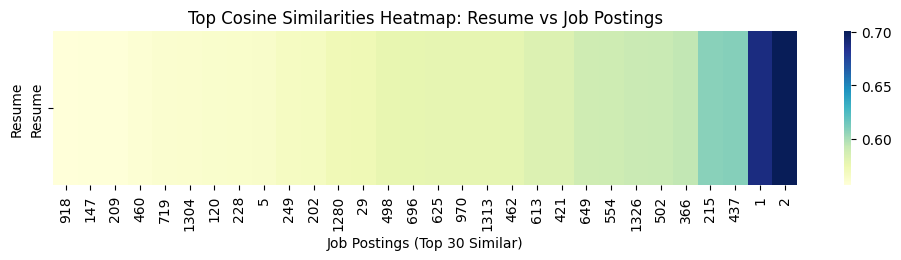

Number of None values in cosine similarities: 0
                             Agency                            Business Title  \
1      DEPARTMENT OF BUSINESS SERV.  EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT   
0      DEPARTMENT OF BUSINESS SERV.                           Account Manager   
436  DEPT OF ENVIRONMENT PROTECTION             Industrial Control Technician   
214    DEPT OF INFO TECH & TELECOMM                                QA Analyst   
365    DEPT OF INFO TECH & TELECOMM                 Senior Service Desk Agent   

                                       Job Description  Cosine_Similarity  
1    the new york city department of small business...           0.700196  
0    division of economic financial opportunity def...           0.688000  
436  the new york city department of environmental ...           0.609275  
214  doitt provides for the sustained efficient and...           0.608010  
365  doitt provides for the sustained efficient and...           0.593701  
Top 5 Job

Saving resume(4).pdf to resume(4) (4).pdf


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Resume embeddings shape: (111, 384)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


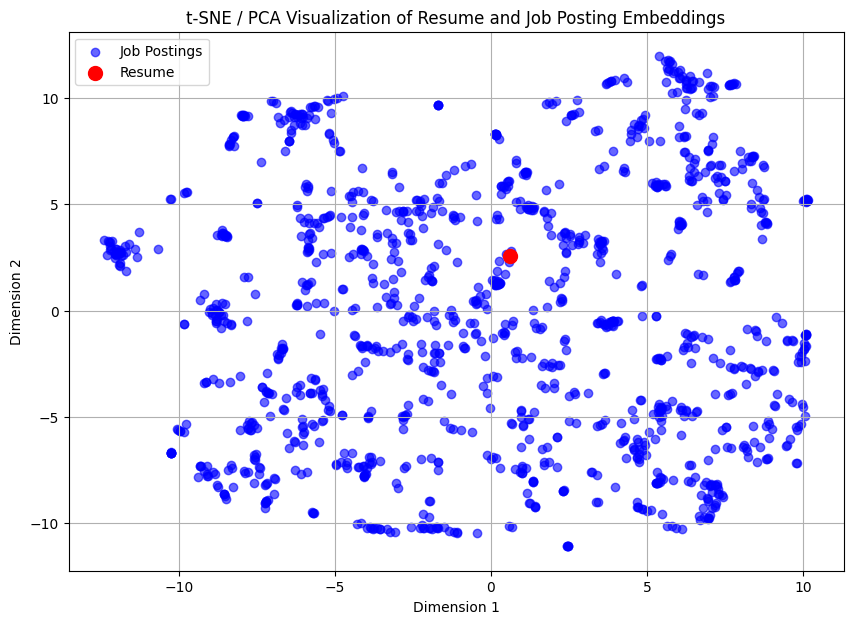

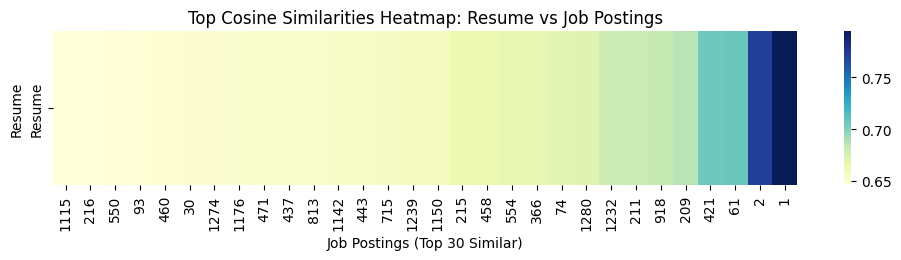

Number of None values in cosine similarities: 0
                           Agency                            Business Title  \
0    DEPARTMENT OF BUSINESS SERV.                           Account Manager   
1    DEPARTMENT OF BUSINESS SERV.  EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT   
60   DEPT OF INFO TECH & TELECOMM                        Payroll Supervisor   
420  DEPT OF INFO TECH & TELECOMM              Workforce Management Analyst   
208             POLICE DEPARTMENT                             Staff Analyst   

                                       Job Description  Cosine_Similarity  
0    division of economic financial opportunity def...           0.794658  
1    the new york city department of small business...           0.770974  
60   doitt provides for the sustained efficient and...           0.707490  
420  doitt provides for the sustained efficient and...           0.706236  
208  a staff analyst level i is a fulltime instruct...           0.686391  
Top 5 Jobs by Cosine 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import ast
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import files
import PyPDF2

def extract_text_from_pdf(pdf_file_path):
    """
    Extract raw text from a PDF file (up to 4 pages).
    """
    text = ""
    try:
        with open(pdf_file_path, 'rb') as pdf_file:
            reader = PyPDF2.PdfReader(pdf_file)
            num_pages = len(reader.pages)
            for page_num in range(min(4, num_pages)):  # Extract up to 4 pages
                page = reader.pages[page_num]
                text += page.extract_text() + "\n"
    except Exception as e:
        print(f"Error extracting text from PDF: {e}")
    return text.strip()

def split_into_chunks(text, max_chunk_size=1000):
    """
    Split text into chunks, initially splitting by newlines. If any chunk exceeds
    max_chunk_size, split it recursively until it fits within the limit.
    """
    # Split by newlines first
    paragraphs = text.split('\n')

    # Initialize a list to hold the final chunks
    chunks = []

    # Function to recursively split large chunks
    def split_large_chunk(chunk):
        if len(chunk) <= max_chunk_size:
            return [chunk]
        # If chunk exceeds max_chunk_size, split it in half and recursively process
        mid = len(chunk) // 2
        split_index = chunk.rfind(' ', 0, mid)  # Split at the nearest space
        if split_index == -1:
            split_index = mid  # Fallback if no space is found
        part1 = chunk[:split_index].strip()
        part2 = chunk[split_index:].strip()
        return split_large_chunk(part1) + split_large_chunk(part2)

    # Iterate over paragraphs and check their length
    for paragraph in paragraphs:
        if len(paragraph) > max_chunk_size:
            chunks.extend(split_large_chunk(paragraph))
        else:
            chunks.append(paragraph)
    return chunks




def visualize_embeddings(resume_embedding, job_postings_embeddings):
    # Concatenate the resume embedding with job postings embeddings
    # Note: resume_embedding should be reshaped to (1, -1) to match dimensions
    all_embeddings = np.vstack([resume_embedding.reshape(1, -1), job_postings_embeddings])

    # Apply PCA for initial dimensionality reduction
    pca = PCA(n_components=min(all_embeddings.shape[0]-1, 50))  # Use the minimum of job postings or 50
    reduced_embeddings = pca.fit_transform(all_embeddings)

    # Apply t-SNE for final 2D visualization
    perplexity_value = min(30, reduced_embeddings.shape[0]-1)  # Ensure perplexity is less than n_samples
    tsne = TSNE(n_components=2, perplexity=perplexity_value, n_iter=300)
    embeddings_2d = tsne.fit_transform(reduced_embeddings)

    # Separate the 2D embeddings for the resume and job postings
    resume_2d = embeddings_2d[0]
    job_postings_2d = embeddings_2d[1:]

    # Plot
    plt.figure(figsize=(10, 7))
    plt.scatter(job_postings_2d[:, 0], job_postings_2d[:, 1], color='blue', label="Job Postings", alpha=0.6)
    plt.scatter(resume_2d[0], resume_2d[1], color='red', label="Resume", s=100)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("t-SNE / PCA Visualization of Resume and Job Posting Embeddings")
    plt.legend()
    plt.grid()
    plt.show()

# visualize_embeddings(average_resume_embedding, np.vstack(df['super_embedding'].to_numpy()))

def cosine_similarity_heatmap(resume_embedding, job_postings_embeddings, top_n=10):
    # Calculate cosine similarity between the resume embedding and each job posting embedding
    similarities = []
    for job_embedding in job_postings_embeddings:
        similarity = cosine_similarity(resume_embedding.reshape(1, -1), job_embedding.reshape(1, -1)).flatten()[0]
        similarities.append(similarity)

    # Get indices of the top N similarities
    top_indices = np.argsort(similarities)[-top_n:]

    # Prepare the heatmap data for only the top N similarities
    top_similarities = np.array(similarities)[top_indices].reshape(1, -1)  # Reshape to 1 row for the heatmap

    # Create the heatmap
    plt.figure(figsize=(12, 2))  # Adjust the figure size for readability
    sns.heatmap(top_similarities, cmap="YlGnBu", annot=False, cbar=True,
                xticklabels=top_indices + 1, yticklabels=["Resume"])  # +1 for human-readable index
    plt.title("Top Cosine Similarities Heatmap: Resume vs Job Postings")
    plt.xlabel("Job Postings (Top {} Similar)".format(top_n))
    plt.ylabel("Resume")
    plt.show()

# cosine_similarity_heatmap(average_resume_embedding, np.vstack(df['super_embedding'].to_numpy()))

def idea1():
    print(f"please upload a resume")
    uploaded = files.upload()

    for file_path in uploaded.keys():
        pdf_file_path = file_path

        # Step 1: Extract raw text from the PDF
        raw_text = extract_text_from_pdf(pdf_file_path)

        # Step 2: Split into chunks (each under 1000 characters)
        brokenResume = split_into_chunks(raw_text)

        # Load SBERT model
        model = SentenceTransformer('all-MiniLM-L6-v2')  # Example of a lightweight SBERT model


        # Step 3: Create embeddings for each chunk in the resume
        resume_embeddings = model.encode(brokenResume)

        print(f"Resume embeddings shape: {resume_embeddings.shape}")

        # Step 4: Read the CSV file
        csv_file = "job_postings_with_super_embeddings.csv"
        df = pd.read_csv(csv_file)

        # Step 5: Access the super embedding column (which is a string of list format)
        super_embeddings = df['super_embedding']

        # Step 6: Convert the string of embeddings to a list of floats for each row
        # Replace spaces with commas before evaluating
        def parse_embedding(embedding_str):
            # Strip the square brackets and convert the string to a NumPy array
            return np.fromstring(embedding_str.strip('[]'), sep=' ')

        # Apply the function to the super_embedding column
        df['super_embedding'] = df['super_embedding'].apply(parse_embedding)

        # Step 7: Compute the average of the resume embeddings
        average_resume_embedding = np.mean(resume_embeddings, axis=0)

        # Visualise the data
        visualize_embeddings(average_resume_embedding, np.vstack(df['super_embedding'].to_numpy()))
        cosine_similarity_heatmap(average_resume_embedding, np.vstack(df['super_embedding'].to_numpy()), 30)

        # Function to reduce the longer vector using PCA to match the length of the shorter vector
        def reduce_to_shorter_with_pca(vector1, vector2):
            """
            Reduces the longer vector to the length of the shorter vector using PCA,
            keeping the input and output structure consistent.
            """
            # Check if either vector is None
            if vector1 is None or vector2 is None:
                print(f"One of the vectors is None: vector1={vector1}, vector2={vector2}")
                return None, None  # Handle this case as needed

            # Determine which vector is longer and apply PCA to match dimensions
            if len(vector1) > len(vector2):
                pca = PCA(n_components=len(vector2))
                vector1_reduced = pca.fit_transform(vector1.reshape(1, -1)).flatten()
                return vector1_reduced, vector2
            elif len(vector2) > len(vector1):
                pca = PCA(n_components=len(vector1))
                vector2_reduced = pca.fit_transform(vector2.reshape(1, -1)).flatten()
                return vector1, vector2_reduced
            else:
                return vector1, vector2  # If they are already the same length

        # Step 8: Initialize a list to store cosine similarities
        cosine_similarities = []

        # Step 9: Iterate through the DataFrame and compute cosine similarities
        for index, row in df.iterrows():
            job_vector = row['super_embedding']
            # Use PCA to reduce the longer vector to match the length of the shorter vector
            reduced_resume, reduced_job = reduce_to_shorter_with_pca(average_resume_embedding, job_vector)
            if reduced_resume is not None and reduced_job is not None:
                # Compute cosine similarity
                similarity = cosine_similarity([reduced_resume], [reduced_job]).flatten()[0]
                cosine_similarities.append(similarity)

        # Debugging: Check for None values in cosine similarities
        none_similarities = cosine_similarities.count(None)
        print(f"Number of None values in cosine similarities: {none_similarities}")

        # Step 10: Add the cosine similarities to the DataFrame
        df['Cosine_Similarity'] = cosine_similarities

        # Step 11: Rank the jobs by cosine similarity and select the top 5
        top_5_jobs = df.nlargest(5, 'Cosine_Similarity')

        # Display the top 5 matching jobs (customize based on the CSV structure)
        print(top_5_jobs[['Agency', 'Business Title', 'Job Description', 'Cosine_Similarity']])

        print("Top 5 Jobs by Cosine Similarity:")
        print(df[df['Cosine_Similarity'].isin(top_5_jobs['Cosine_Similarity'])])

idea1()
print("# ================================================ #")
print("#                                                  #")
print("# ================================================ #")
idea1()
print("# ================================================ #")
print("#                                                  #")
print("# ================================================ #")
idea1()
print("# ================================================ #")
print("#                                                  #")
print("# ================================================ #")
idea1()


**IDEA 2**:

In [16]:
!pip install transformers
!pip install torch
!pip install sentencepiece
!pip install pdfplumber  # For reading PDF resumes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 50.9 MB/s eta 0:00:00


please upload a resume


Saving resume(1).pdf to resume(1) (15).pdf
Chunk 1:
Skills_based_CV.qxd 5/8/11 3:55 pm Page 1
Example of a skills-based CV
ASHLEY GILL
3 Lappage Court Telephone: 01882 652349
Tyler Green, Bucks. Mobile: 07717 121824
HP8 4JD Email: ashleygill2023@gotmail.com
Personal Details
Summary
• Business studies with Spanish undergraduate.
• Ability to speak French and Spanish.
• Extensive business experience including an internship with Top Choice Holidays.
Education And Qualifications
2008 – present Buckinghamshire Edge University
BA International Business Studies with Spanish (expected 2:1)
Relate your degree to • Study semester atThe University of Valloid (Spain).
the job by listing your • Six-month work placementin Madrid.
relevantmodules/ • Relevantmodules included: Business Planning; Sales Promotion and
dissertation. Marketing; and Business Operations Management.
2000 – 2007 Freebridge School
A-Levels: Business Studies (B), French (C)
8 GCSEs including Maths, English, Spanish and French
Wor

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


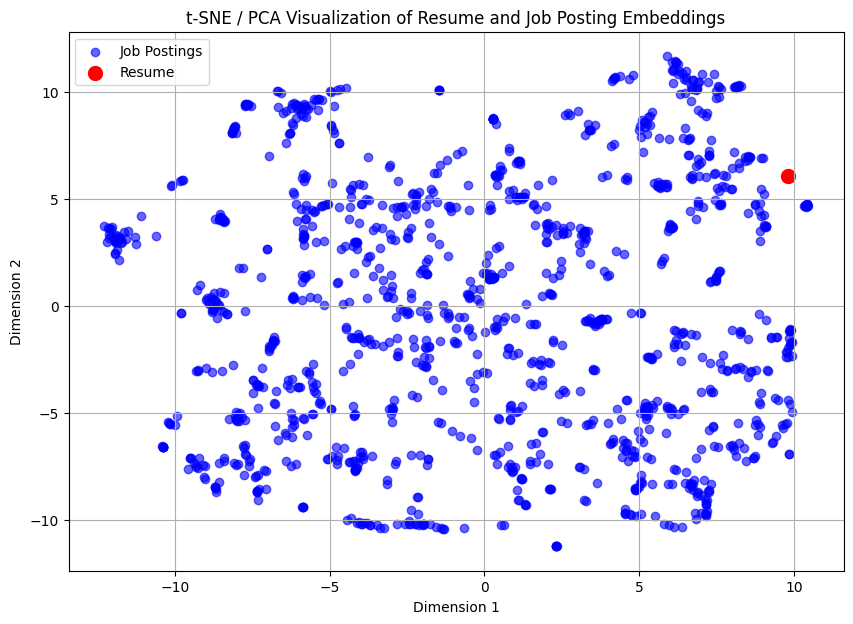

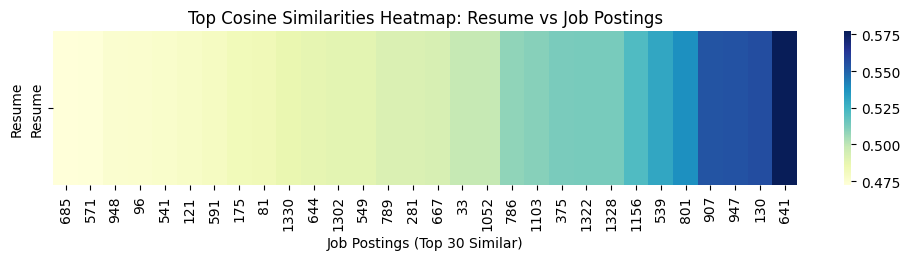

Number of None values in cosine similarities: 0
                             Agency                     Business Title  \
640    DEPT OF INFO TECH & TELECOMM                       DBA Engineer   
129    DEPT OF INFO TECH & TELECOMM  SQL/Oracle Database Administrator   
946  HOUSING PRESERVATION & DVLPMNT             Database Administrator   
906  HOUSING PRESERVATION & DVLPMNT         Data Modeler/ETL Developer   
800        DEPARTMENT OF SANITATION                 Database Developer   

                                       Job Description  Cosine_Similarity  
640  doitt provides for the sustained efficient and...           0.577032  
129  doitt provides for the sustained efficient and...           0.555887  
946  hpd is seeking a sql database administrator th...           0.554316  
906  hpd tech is the it division within hpd hpd tec...           0.554027  
800  the bureau of information technology bit is re...           0.538066  
Top 5 Jobs by Cosine Similarity:
                  

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


please upload a resume


Saving Resume(2).pdf to Resume(2) (6).pdf
Chunk 1:
Forename Surname
Email address | Mobile Number | LinkedIn
Final year BSc Management student at The University of Manchester with a solid
foundation in business principles, operational activities and management strategies.
Seeking an opportunity to apply knowledge and skills to a graduate management
consultancy role.
Education
XXXX – Present The University of Manchester BSc Management
• Developed a comprehensive understanding of management practices and theories
through lectures, participative tutorials, and independent readings. Knowledge was
practically applied through realistic case-oriented assignments, receiving a First-
Class grade in first two years of study.
• Demonstrated qualitative skills in financial analysis, accounting and economic
course units. Continuously practiced calculations to ensure a comprehensive
understanding to reach the correct results consistently.
• Demonstrated quantitative skills in financial analysis, acc

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


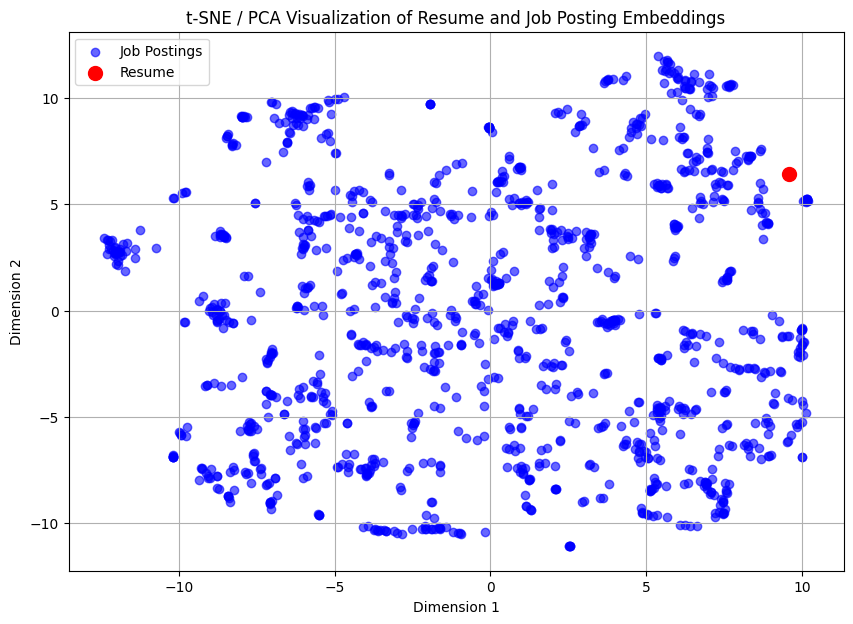

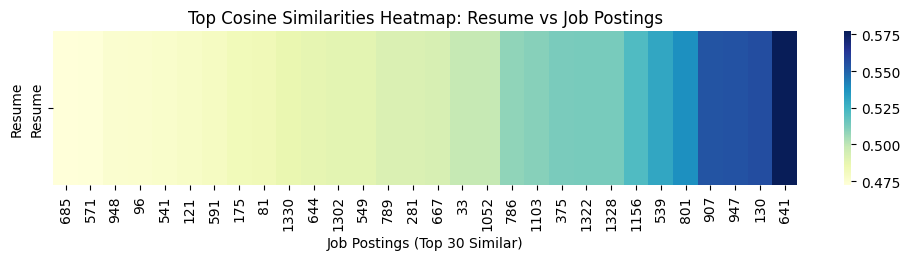

Number of None values in cosine similarities: 0
                             Agency                     Business Title  \
640    DEPT OF INFO TECH & TELECOMM                       DBA Engineer   
129    DEPT OF INFO TECH & TELECOMM  SQL/Oracle Database Administrator   
946  HOUSING PRESERVATION & DVLPMNT             Database Administrator   
906  HOUSING PRESERVATION & DVLPMNT         Data Modeler/ETL Developer   
800        DEPARTMENT OF SANITATION                 Database Developer   

                                       Job Description  Cosine_Similarity  
640  doitt provides for the sustained efficient and...           0.577032  
129  doitt provides for the sustained efficient and...           0.555887  
946  hpd is seeking a sql database administrator th...           0.554316  
906  hpd tech is the it division within hpd hpd tec...           0.554027  
800  the bureau of information technology bit is re...           0.538066  
Top 5 Jobs by Cosine Similarity:
                  

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


please upload a resume


Saving Resume(3).pdf to Resume(3) (5).pdf
Chunk 1:
Ben Jeneer
benjaminjeneer20@gmail.com, 00000000000, linkedin.com/in/benjaminjeneer20
Education
2021 - 2024 BEng (Hons) Mechanical Engineering (2:1)
The University of Manchester
• Collaborated with peers for final year group project, which focused on designing a small roof-
mounted wind turbine for UK home application in rural areas. Actively directed the project over a
nine-week time frame where the plan was laid out using a GANTT chart.
• Learned to budget to balance product cost with efficiency and quality.
• Developed an understanding of physical principles of electronics, electromagnets and digital
circuits.
• Designed and assembled structures using CAD software SolidWorks.
• Conducted numerical analysis using C++.
2016 - 2018 Highrise College
• A-Levels: Computer Science (A), Mathematics (A*), Physics (B).
2011-2016 Weldmann High School
• GCSEs: 10 A* - A including Maths, Science and English.
Relevant Work Experience
June 2023 – A

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


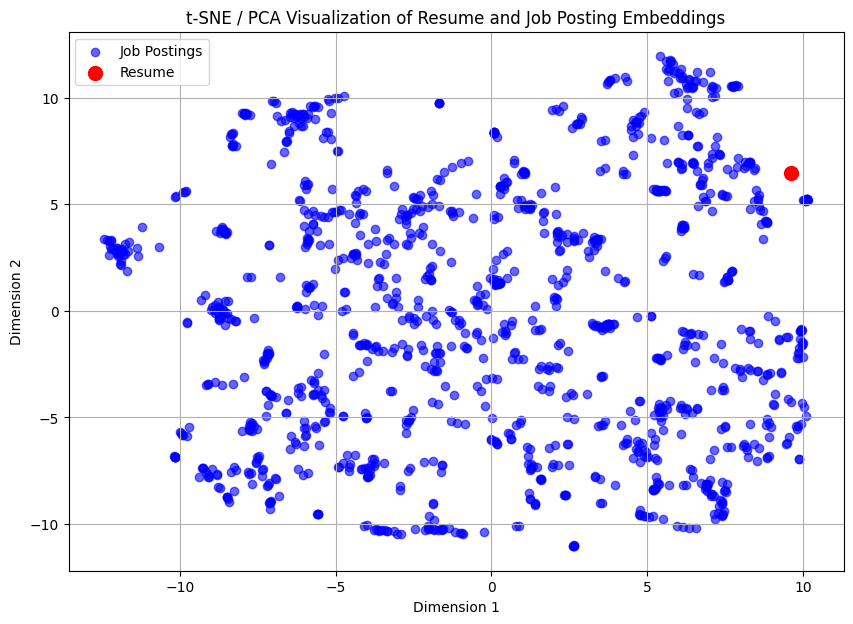

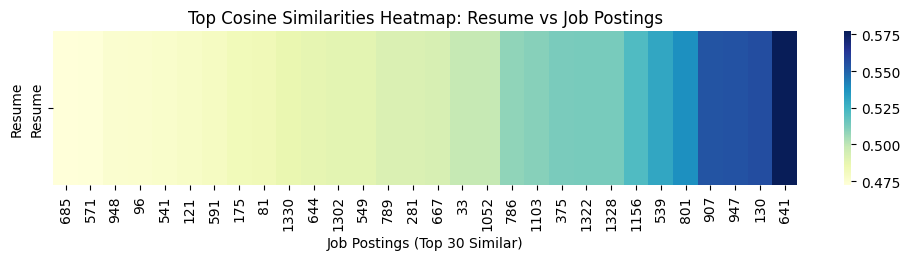

Number of None values in cosine similarities: 0
                             Agency                     Business Title  \
640    DEPT OF INFO TECH & TELECOMM                       DBA Engineer   
129    DEPT OF INFO TECH & TELECOMM  SQL/Oracle Database Administrator   
946  HOUSING PRESERVATION & DVLPMNT             Database Administrator   
906  HOUSING PRESERVATION & DVLPMNT         Data Modeler/ETL Developer   
800        DEPARTMENT OF SANITATION                 Database Developer   

                                       Job Description  Cosine_Similarity  
640  doitt provides for the sustained efficient and...           0.577032  
129  doitt provides for the sustained efficient and...           0.555887  
946  hpd is seeking a sql database administrator th...           0.554316  
906  hpd tech is the it division within hpd hpd tec...           0.554027  
800  the bureau of information technology bit is re...           0.538066  
Top 5 Jobs by Cosine Similarity:
                  

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


please upload a resume


Saving resume(4).pdf to resume(4) (5).pdf
Chunk 1:
Wendy Harris
Human resources officer
PERSONAL SUMMARY
AREAS OF E XPERTISE
A multi-skilled professional with good all-round HR advisory skills. Very capable
Recruitment
with an ability deal with all the recruitment and resourcing needs of a organisation.
Experienced in providing timely and up to date HR advice to both managers and
Employee relations
employees whilst at the same time making sure both the employee and employers
interests are best represented. Extensive knowledge of working practices,
Pay administration
recruitment, pay, conditions of employment and diversity issues.
Performance management Now seeking a suitable human resources officer position with a ambitious company.
Employment legislation
WORK EXPERIENCE
Financial rep ort writing
Manufacturing Company – Coventry
HUMAN RESOURCES OFFICER June 2008 - Present
Equal opport unities
Dealing with all of the recruitment needs & employment issues of the company.
Absence mana gem

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


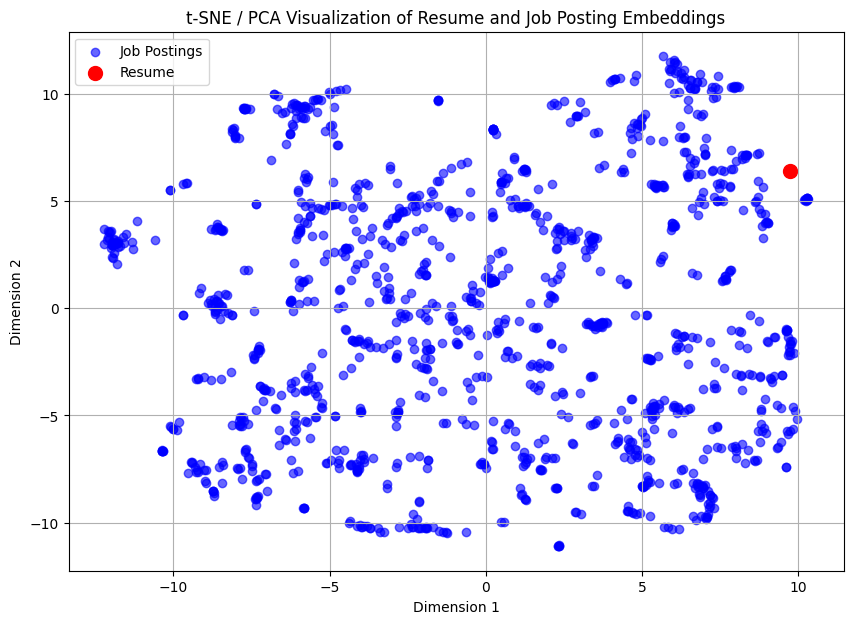

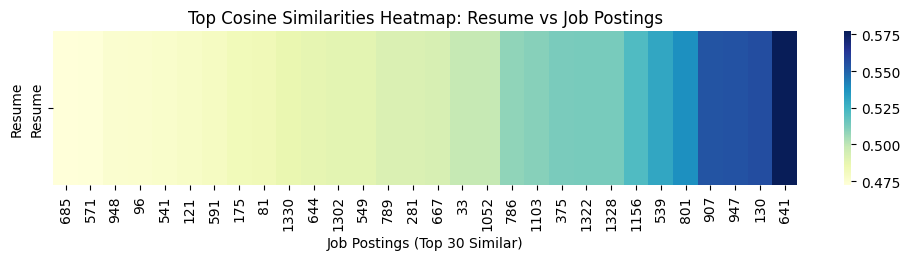

Number of None values in cosine similarities: 0
                             Agency                     Business Title  \
640    DEPT OF INFO TECH & TELECOMM                       DBA Engineer   
129    DEPT OF INFO TECH & TELECOMM  SQL/Oracle Database Administrator   
946  HOUSING PRESERVATION & DVLPMNT             Database Administrator   
906  HOUSING PRESERVATION & DVLPMNT         Data Modeler/ETL Developer   
800        DEPARTMENT OF SANITATION                 Database Developer   

                                       Job Description  Cosine_Similarity  
640  doitt provides for the sustained efficient and...           0.577032  
129  doitt provides for the sustained efficient and...           0.555887  
946  hpd is seeking a sql database administrator th...           0.554316  
906  hpd tech is the it division within hpd hpd tec...           0.554027  
800  the bureau of information technology bit is re...           0.538066  
Top 5 Jobs by Cosine Similarity:
                  

In [44]:
import pdfplumber
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import ast
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import PyPDF2

def visualize_embeddings(resume_embedding, job_postings_embeddings):
    # Concatenate the resume embedding with job postings embeddings
    # Note: resume_embedding should be reshaped to (1, -1) to match dimensions
    all_embeddings = np.vstack([resume_embedding.reshape(1, -1), job_postings_embeddings])

    # Apply PCA for initial dimensionality reduction
    pca = PCA(n_components=min(all_embeddings.shape[0]-1, 50))  # Use the minimum of job postings or 50
    reduced_embeddings = pca.fit_transform(all_embeddings)

    # Apply t-SNE for final 2D visualization
    perplexity_value = min(30, reduced_embeddings.shape[0]-1)  # Ensure perplexity is less than n_samples
    tsne = TSNE(n_components=2, perplexity=perplexity_value, n_iter=300)
    embeddings_2d = tsne.fit_transform(reduced_embeddings)

    # Separate the 2D embeddings for the resume and job postings
    resume_2d = embeddings_2d[0]
    job_postings_2d = embeddings_2d[1:]

    # Plot
    plt.figure(figsize=(10, 7))
    plt.scatter(job_postings_2d[:, 0], job_postings_2d[:, 1], color='blue', label="Job Postings", alpha=0.6)
    plt.scatter(resume_2d[0], resume_2d[1], color='red', label="Resume", s=100)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("t-SNE / PCA Visualization of Resume and Job Posting Embeddings")
    plt.legend()
    plt.grid()
    plt.show()

# visualize_embeddings(average_resume_embedding, np.vstack(df['super_embedding'].to_numpy()))

def cosine_similarity_heatmap(resume_embedding, job_postings_embeddings, top_n=10):
    # Calculate cosine similarity between the resume embedding and each job posting embedding
    similarities = []
    for job_embedding in job_postings_embeddings:
        similarity = cosine_similarity(resume_embedding.reshape(1, -1), job_embedding.reshape(1, -1)).flatten()[0]
        similarities.append(similarity)

    # Get indices of the top N similarities
    top_indices = np.argsort(similarities)[-top_n:]

    # Prepare the heatmap data for only the top N similarities
    top_similarities = np.array(similarities)[top_indices].reshape(1, -1)  # Reshape to 1 row for the heatmap

    # Create the heatmap
    plt.figure(figsize=(12, 2))  # Adjust the figure size for readability
    sns.heatmap(top_similarities, cmap="YlGnBu", annot=False, cbar=True,
                xticklabels=top_indices + 1, yticklabels=["Resume"])  # +1 for human-readable index
    plt.title("Top Cosine Similarities Heatmap: Resume vs Job Postings")
    plt.xlabel("Job Postings (Top {} Similar)".format(top_n))
    plt.ylabel("Resume")
    plt.show()

def idea2():
    # Load GPT-2 XL model and tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2-xl")
    model = GPT2LMHeadModel.from_pretrained("gpt2-xl")

    # Set the model to evaluation mode
    model.eval()

    print(f"please upload a resume")
    uploaded = files.upload()

    for file_path in uploaded.keys():

        # Function to extract text from PDF
        def extract_text_from_pdf(pdf_path):
            with pdfplumber.open(pdf_path) as pdf:
                full_text = ""
                for page in pdf.pages:
                    full_text += page.extract_text()
            return full_text

        # Function to split text into smaller chunks using GPT-2
        def split_text_into_chunks(text, model, tokenizer, max_chunk_size=1000):
            tokens = tokenizer.encode(text, return_tensors="pt")

            # If the text is already small enough
            if len(tokens[0]) <= max_chunk_size:
                return [text]

            # Initialize an empty list to store the chunks
            chunks = []
            start_idx = 0
            end_idx = max_chunk_size

            while start_idx < len(tokens[0]):
                # Generate a chunk of the text
                chunk_tokens = tokens[0][start_idx:end_idx]
                chunk_text = tokenizer.decode(chunk_tokens, skip_special_tokens=True)

                # Ensure the chunk doesn't split mid-sentence by using GPT-2 to help identify context
                inputs = tokenizer(chunk_text, return_tensors="pt")
                with torch.no_grad():
                    outputs = model(**inputs)
                    predictions = outputs.logits

                # Append the chunk to the list
                chunks.append(chunk_text)

                # Move the indices for the next chunk
                start_idx = end_idx
                end_idx = start_idx + max_chunk_size

                # Ensure that the new chunk size does not exceed the maximum allowed token length
                end_idx = min(end_idx, len(tokens[0]))

            return chunks

        # Function to split text into "page-long" sections
        def split_text_by_pages(text, page_size=3000):
            # Split text into page-long chunks (roughly 3000 characters per page)
            pages = [text[i:i + page_size] for i in range(0, len(text), page_size)]
            return pages

        pdf_file_path = file_path

        # Step 1: Extract raw text from the PDF
        resume_text = extract_text_from_pdf(pdf_file_path)

        # Step 2: Split the raw text into page-long chunks (assuming 3000 characters per page)
        page_chunks = split_text_by_pages(resume_text, page_size=3000)

        # Step 3: Process each page-long chunk through GPT-2 for further splitting
        broken_resume = []
        for page_chunk in page_chunks:
            broken_resume.extend(split_text_into_chunks(page_chunk, model, tokenizer, max_chunk_size=1000))

        # Display the chunks
        for idx, chunk in enumerate(broken_resume):
            print(f"Chunk {idx + 1}:\n{chunk}\n{'-' * 80}")


        print('Now to use the broken resumes...')

        # Load SBERT model
        model = SentenceTransformer('all-MiniLM-L6-v2')  # Example of a lightweight SBERT model


        # Step 4: Create embeddings for each chunk in the resume
        resume_embeddings = model.encode(brokenResume)

        print(f"Resume embeddings shape: {resume_embeddings.shape}")

        # Step 5: Read the CSV file
        csv_file = "job_postings_with_super_embeddings.csv"
        df = pd.read_csv(csv_file)

        # Step 6: Access the super embedding column (which is a string of list format)
        super_embeddings = df['super_embedding']

        # Step 7: Convert the string of embeddings to a list of floats for each row
        # Replace spaces with commas before evaluating
        def parse_embedding(embedding_str):
            # Strip the square brackets and convert the string to a NumPy array
            return np.fromstring(embedding_str.strip('[]'), sep=' ')

        # Apply the function to the super_embedding column
        df['super_embedding'] = df['super_embedding'].apply(parse_embedding)

        # Step 8: Compute the average of the resume embeddings
        average_resume_embedding = np.mean(resume_embeddings, axis=0)

        # Visualise the data
        visualize_embeddings(average_resume_embedding, np.vstack(df['super_embedding'].to_numpy()))
        cosine_similarity_heatmap(average_resume_embedding, np.vstack(df['super_embedding'].to_numpy()), 30)

        # Function to reduce the longer vector using PCA to match the length of the shorter vector
        def reduce_to_shorter_with_pca(vector1, vector2):
            """
            Reduces the longer vector to the length of the shorter vector using PCA,
            keeping the input and output structure consistent.
            """
            # Check if either vector is None
            if vector1 is None or vector2 is None:
                print(f"One of the vectors is None: vector1={vector1}, vector2={vector2}")
                return None, None  # Handle this case as needed

            # Determine which vector is longer and apply PCA to match dimensions
            if len(vector1) > len(vector2):
                pca = PCA(n_components=len(vector2))
                vector1_reduced = pca.fit_transform(vector1.reshape(1, -1)).flatten()
                return vector1_reduced, vector2
            elif len(vector2) > len(vector1):
                pca = PCA(n_components=len(vector1))
                vector2_reduced = pca.fit_transform(vector2.reshape(1, -1)).flatten()
                return vector1, vector2_reduced
            else:
                return vector1, vector2  # If they are already the same length

        # Step 8: Initialize a list to store cosine similarities
        cosine_similarities = []

        # Step 9: Iterate through the DataFrame and compute cosine similarities
        for index, row in df.iterrows():
            job_vector = row['super_embedding']
            # Use PCA to reduce the longer vector to match the length of the shorter vector
            reduced_resume, reduced_job = reduce_to_shorter_with_pca(average_resume_embedding, job_vector)
            if reduced_resume is not None and reduced_job is not None:
                # Compute cosine similarity
                similarity = cosine_similarity([reduced_resume], [reduced_job]).flatten()[0]
                cosine_similarities.append(similarity)

        # Debugging: Check for None values in cosine similarities
        none_similarities = cosine_similarities.count(None)
        print(f"Number of None values in cosine similarities: {none_similarities}")

        # Step 11: Add the cosine similarities to the DataFrame
        df['Cosine_Similarity'] = cosine_similarities

        # Step 12: Rank the jobs by cosine similarity and select the top 5
        top_5_jobs = df.nlargest(5, 'Cosine_Similarity')

        # Display the top 5 matching jobs (customize based on the CSV structure)
        print(top_5_jobs[['Agency', 'Business Title', 'Job Description', 'Cosine_Similarity']])

        print("Top 5 Jobs by Cosine Similarity:")
        print(df[df['Cosine_Similarity'].isin(top_5_jobs['Cosine_Similarity'])])

idea2()
print("# ================================================ #")
print("#                                                  #")
print("# ================================================ #")
idea2()
print("# ================================================ #")
print("#                                                  #")
print("# ================================================ #")
idea2()
print("# ================================================ #")
print("#                                                  #")
print("# ================================================ #")
idea2()


#5) Above and Beyond

Now, with not much time left before the deadline for this case study, we look at challenging ourselves with further optimising our model, and considering ways we could improve it with more time or resources.

Code that is wrapped in tripple quotes is not meant to be run - it is only for demonstration of the data preprocessing for this part, which I assumed isn't very interesting to the reader. If I am wrong, feel free to remove the quotes and run the code - you can find the required CSV in the uploaded folder.

I have a hunch that there are many, many ways to improve the current model, but I don't have enough time to implement and explore these. So, below is one route, and after, I will discuss some of my other ideas for improvement and implementation.

The current strategy, is to create a **regression model**. It will output a numeric embedding representing the job category that a resume was likely used to apply for. The reason for a regression based architecture, as opposed to some classification specific architecture, is that small changes in the embedding will not make a big difference during use with cosine similarity. I am opting to use CNNs, because they are excellent at spotting local and global patterns, and have even been proven to excel in multi-classification problems - see below for a citation to a research article. I have a gut feeling that a CNN will extract key features of an input resume very well...

In [21]:
!pip install transformers torch PyMuPDF
!pip install sentence-transformers

In [23]:
"""
from transformers import pipeline
import fitz  # PyMuPDF
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import pickle
from google.colab import files

print('please upload "UpdatedResumeDataSet.csv"')
uploaded = files.upload()
# Load the dataset
df = pd.read_csv('UpdatedResumeDataSet.csv')

# Output all unique entries in 'Category'
unique_categories = df['Category'].unique().tolist()
print("Unique entries in 'Category':")
print(unique_categories)


def clean_text(text):
    # Clean and normalize the text by removing special characters and converting to lowercase.
    if isinstance(text, str):  # Check if the input is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
        text = text.strip()  # Remove leading/trailing whitespace
    return text

# Apply cleaning function to 'Category' and 'Resume' columns
df['Category'] = df['Category'].apply(clean_text)
df['Resume'] = df['Resume'].apply(clean_text)

# Display the cleaned data
print("\nCleaned 'Category' and 'Resume':")
print(df[['Category', 'Resume']].head())

# Split the data into input (X) and target (y)
X = df['Resume']
y = df['Category']

# Split the data into training (70%), validation (18%), and testing (12%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.40, random_state=42, stratify=y_temp)  # 0.40 of 0.30 is 12%

# Combine the splits into a single dictionary
data_splits = {
    'x_train': X_train,
    'x_val': X_val,
    'x_test': X_test,
    'y_train': y_train,
    'y_val': y_val,
    'y_test': y_test
}

# Export the data splits using pickle
with open('data_splits.pkl', 'wb') as f:
    pickle.dump(data_splits, f)

print("\nData splits have been exported to 'data_splits.pkl'")
"""

'\nfrom transformers import pipeline\nimport fitz  # PyMuPDF\nimport pandas as pd\nimport re\nfrom sklearn.model_selection import train_test_split\nimport pickle\nfrom google.colab import files\n\nprint(\'please upload "UpdatedResumeDataSet.csv"\')\nuploaded = files.upload()\n# Load the dataset\ndf = pd.read_csv(\'UpdatedResumeDataSet.csv\')\n\n# Output all unique entries in \'Category\'\nunique_categories = df[\'Category\'].unique().tolist()\nprint("Unique entries in \'Category\':")\nprint(unique_categories)\n\n\ndef clean_text(text):\n    # Clean and normalize the text by removing special characters and converting to lowercase.\n    if isinstance(text, str):  # Check if the input is a string\n        text = text.lower()  # Convert to lowercase\n        text = re.sub(r\'[^a-zA-Z0-9\\s]\', \'\', text)  # Remove special characters\n        text = text.strip()  # Remove leading/trailing whitespace\n    return text\n\n# Apply cleaning function to \'Category\' and \'Resume\' columns\ndf[\'

#Data preperation

In [45]:
import fitz  # PyMuPDF
from transformers import pipeline
import torch
from google.colab import files
import pickle

# Step 1: Upload data files
uploaded = files.upload()

# Step 2: Load the data splits using pickle
with open('data_splits.pkl', 'rb') as f:
    data_splits = pickle.load(f)

# Extract the individual datasets
x_train = data_splits['x_train']
x_val = data_splits['x_val']
x_test = data_splits['x_test']
y_train = data_splits['y_train']
y_val = data_splits['y_val']
y_test = data_splits['y_test']

print(y_train.shape)
print(y_train)

# Step 3: Initialize the SBERT model
miniLM_model = SentenceTransformer('all-MiniLM-L6-v2')  # For simplification, don't utilise CUDAs for now

# Step 4: Generate embeddings
y_train_embeddings = miniLM_model.encode(y_train.tolist(), convert_to_tensor=True)

# Step 3: Check the shape of the resulting embeddings
print("y_train_embeddings shape:", y_train_embeddings.shape)  # Should print: torch.Size([673, 384])

# Now, y_train_embeddings is ready for use in your model

Saving data_splits.pkl to data_splits (1).pkl
(673,)
455        automation testing
595          python developer
338            java developer
349            java developer
552          python developer
                ...          
578          python developer
503    electrical engineering
31               data science
145             web designing
943                   testing
Name: Category, Length: 673, dtype: object


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


y_train_embeddings shape: torch.Size([673, 384])


#Model definition, along with custom criterion

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNTextModel(nn.Module):
    def __init__(self, output_dim=384, embedding_dim=384):
        super(CNNTextModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=3)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3)
        self.conv3 = nn.Conv1d(in_channels=256, out_channels=512, kernel_size=3)

        # Calculate the output dimension after the convolutions
        conv_output_dim = ((embedding_dim - 2) - 2 - 2) * 512  # After 3 convolutions  # No pooling, adjust kernel size accordingly

        # Fully connected layers
        self.fc1 = nn.Linear(conv_output_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, output_dim)  # Output layer for regression

        # Dropout layer for regularization
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # x = x.unsqueeze(1)  # Add channel dimension if needed
        # print("After unsqueeze:", x.shape) # debugging

        x = F.relu(self.conv1(x))
        # print("After conv1:", x.shape)

        x = F.relu(self.conv2(x))
        # print("After conv2:", x.shape)

        x = F.relu(self.conv3(x))
        # print("After conv3:", x.shape)

        x = x.view(x.size(0), -1)  # Flatten tensor
        # print("After flattening:", x.shape)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

# Cosine similarity-based loss with a regression criterion
class CosineSimilarityLoss(nn.Module):
    def __init__(self, primary_loss_weight=0.5):
        super(CosineSimilarityLoss, self).__init__()
        self.primary_loss_weight = primary_loss_weight
        self.mse_loss = nn.MSELoss()  # Use MSE for regression

    def forward(self, outputs, labels):
        # Calculate MSE loss as the primary loss
        mse_loss_value = self.mse_loss(outputs, labels)

        # Calculate cosine similarity loss
        cos_sim = F.cosine_similarity(outputs, labels.float(), dim=-1)
        cosine_loss = 1 - cos_sim.mean()

        # Combine the losses
        combined_loss = (self.primary_loss_weight * mse_loss_value) + ((1 - self.primary_loss_weight) * cosine_loss)

        return combined_loss




#Data preprocessing for training usage

In [49]:
import torch
from sentence_transformers import SentenceTransformer

# Step 1: Load the embedding model (e.g., SentenceTransformer)
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Step 2: Define x_train dataset of string resumes
x_train = x_train

# Step 3: Encode each resume into a 384-dimensional embedding
embeddings = embedding_model.encode(x_train.tolist())  # Ensure it's a list

# Step 4: Convert embeddings to a tensor
embeddings_tensor = torch.tensor(embeddings)  # Shape: (num_resumes, 384)

# Step 5: Reshape tensor to add a channel dimension for CNN compatibility
# The CNN model expects input in the form (batch_size, channels, embedding_length)
embeddings_tensor = embeddings_tensor.unsqueeze(1)  # Shape: (num_resumes, 1, 384)

# Optional: verify shape compatibility with the model
print("Embeddings tensor shape:", embeddings_tensor.shape)  # Should print (num_resumes, 1, 384)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Embeddings tensor shape: torch.Size([673, 1, 384])


In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sentence_transformers import SentenceTransformer


# Step 6: Create a TensorDataset
dataset = TensorDataset(embeddings_tensor, y_train_embeddings)

# Step 7: Create a DataLoader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 8: Check shapes of the DataLoader batches
for batch_data, batch_labels in dataloader:
    print(f"Batch Data Shape: {batch_data.shape}")  # Expected shape will be (batch_size, 1, 384)
    print(f"Batch Labels Shape: {batch_labels.shape}")  # Expected shape will be (batch_size, 384)
    break  # Only check the first batch

# Now the dataloader is ready for training your regression model

# Step 8: Check shapes of the DataLoader batches
for batch_data, batch_labels in dataloader:
    # Check shape of batch_data
    assert batch_data.dim() == 3, f"Expected 3D tensor for batch_data, but got {batch_data.dim()}D."
    assert batch_data.shape[1] == 1, f"Expected {batch_size}, 1, 384 but got {batch_data.shape}."
    assert batch_data.shape[2] == 384, f"Expected {batch_size}, 1, 384 but got {batch_data.shape}."

    # Check shape of batch_labels
    assert batch_labels.dim() == 2, f"Expected 2D tensor for batch_labels, but got {batch_labels.dim()}D."
    assert batch_labels.shape[1] == 384, f"Expected {batch_size}, 384 but got {batch_labels.shape}."

    print(f"Batch Data Shape: {batch_data.shape}")  # Expected shape: (batch_size, 1, 384)
    print(f"Batch Labels Shape: {batch_labels.shape}")  # Expected shape: (batch_size, 384)
    break  # Only check the first batch

# Now the dataloader is ready for training your regression model


Batch Data Shape: torch.Size([32, 1, 384])
Batch Labels Shape: torch.Size([32, 384])
Batch Data Shape: torch.Size([32, 1, 384])
Batch Labels Shape: torch.Size([32, 384])


#Training loop

In [51]:
import torch
import torch.optim as optim
from tqdm import tqdm

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Step 2: Initialize the model, criterion, and optimizer
output_dim = 384  # Assuming this matches the embedding size for regression
model = CNNTextModel(output_dim=output_dim).to(device)  # Move model to CUDA if available

criterion = CosineSimilarityLoss(primary_loss_weight=0.8)  # Use your defined criterion
criterion.to(device)  # Move criterion to CUDA if available
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Use Adam optimizer with a learning rate of 0.001

# Step 3: Training loop
num_epochs = 4  # Set the number of epochs
model.train()  # Set the model to training mode

for epoch in range(num_epochs):
    epoch_loss = 0
    total_correct = 0
    total_samples = 0

    # Iterate over the DataLoader
    for batch_data, batch_labels in tqdm(dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        batch_data = batch_data.to(device)  # Move batch data to CUDA if available
        batch_labels = batch_labels.to(device)  # Move batch labels to CUDA if available

        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(batch_data)  # Get model outputs

        # Compute the loss
        loss = criterion(outputs, batch_labels)
        epoch_loss += loss.item()  # Accumulate loss

        # Backward pass and optimize
        loss.backward()  # Compute gradients
        optimizer.step()  # Update weights

        # Calculate accuracy metrics
        predicted = outputs.argmax(dim=1)  # Get the predicted classes
        total_correct += (predicted == batch_labels.argmax(dim=1)).sum().item()  # Count correct predictions
        total_samples += batch_data.size(0)  # Number of samples in the batch

    # Step 4: Print epoch results
    avg_loss = epoch_loss / len(dataloader)
    accuracy = (total_correct / total_samples) * 100
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')

print("Training complete.")


Epoch 1/4: 100%|██████████| 22/22 [00:02<00:00, 10.99it/s]


Epoch [1/4], Loss: 0.1962, Accuracy: 2.53%


Epoch 2/4: 100%|██████████| 22/22 [00:00<00:00, 31.92it/s]


Epoch [2/4], Loss: 0.1050, Accuracy: 31.35%


Epoch 3/4: 100%|██████████| 22/22 [00:00<00:00, 31.92it/s]


Epoch [3/4], Loss: 0.0990, Accuracy: 34.62%


Epoch 4/4: 100%|██████████| 22/22 [00:00<00:00, 31.07it/s]

Epoch [4/4], Loss: 0.0973, Accuracy: 34.62%
Training complete.


Although the above training is done pretty poorly (no validation or testing, not many metrics or any visuals) with low accuracy, it is definitely proof of concept for a bigger model that is trained with more data and better technique, performing very well. This model could be used as a helper in some ensemble strategy, greatly increasing relevance of top ranking postings, or it could be turned into the main model with slightly different data (it would now instead be classifying indeces at which to chunk a resume).

#6) Reflection and Conclusion

There were many challenges. Most of the time, I spent time learning through making mistakes and debugging. Truly, I was very surprised by how important data is in Macchine Learning. Before, I thought the techniques and methods in building the perfect model are most important - now, I feel like having quality data is most important, many times over. I found that the model's architecture is usually dependant on the available data, as opposed to the other way around.

One way I realised this is by the shear amount of time I spent trying to source, clean and proccess large amounts of data. Further, the amount of failures I went thorough, simply because I didn't have the required **data**.

In [5]:
from transformers import pipeline
import fitz  # PyMuPDF

uploaded = files.upload()
# no need if vectorisation process repeated

def read_pdf(file_path):
    """Extracts text from a PDF file."""
    text = ""
    with fitz.open(file_path) as pdf_document:
        for page in pdf_document:
            text += page.get_text()
    return text

# Load the NER pipeline
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", aggregation_strategy="simple")

# Extract text from a resume (you can use the read_pdf function)
resume_text = read_pdf('resume.pdf')

# Get entities from the resume text
entities = ner_pipeline(resume_text)

# Display extracted entities
print(entities)


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

KeyboardInterrupt: 

I decided to include some of my failures. The above is one of them - I wanted to be able to process arbitrary resumes, and to do that, I needed to leverage some intelligent model. I tried to use the particular model above, but it only had 3 output categories, none of which were of interest to me.

In [ ]:
from transformers import BigBirdTokenizer, BigBirdForSequenceClassification
import torch
import re

# Load model and tokenizer
tokenizer = BigBirdTokenizer.from_pretrained('google/bigbird-roberta-base')
model = BigBirdForSequenceClassification.from_pretrained('google/bigbird-roberta-base')

# Sample resume text (you would replace this with actual text input)
resume_text = """
John Doe
Professional Summary: A skilled data scientist with over 5 years of experience.
Skills: Python, Machine Learning, Data Visualization, SQL
Education: B.S. in Computer Science from XYZ University, 2019
Work Experience: Data Scientist at ABC Corp from 2020 to Present.
"""

# Tokenize and encode
inputs = tokenizer(resume_text, return_tensors='pt', max_length=2048, truncation=True)

# Model inference
with torch.no_grad():
    outputs = model(**inputs)

# Get logits and calculate probabilities
logits = outputs.logits
probabilities = torch.nn.functional.softmax(logits, dim=-1)

# Define default classifications for resume sections
default_classifications = {
    "Professional Summary": 0,
    "Skills": 1,
    "Education": 2,
    "Certifications": 3,
    "Project1": 4,
    "Project2": 5,
    "Project3": 6,
    "Project4": 7,
    "Work Experience1": 8,
    "Work Experience2": 9,
    "Work Experience3": 10,
    "Work Experience4": 11,
}

# Map the model's output to the default classifications and store related sections
classified_sections = {}
for section, index in default_classifications.items():
    prob = probabilities[0][index].item()  # Get the probability for the section
    if prob > 0.5:  # Adjust the threshold as needed
        classified_sections[section] = prob

# Function to extract sections from resume_text
def extract_sections(resume_text, classified_sections):
    sections = {}
    for section in classified_sections.keys():
        # Use regex to find the section in the resume text
        pattern = re.compile(rf"{section}:(.*?)(?=\n[A-Z])", re.DOTALL)
        match = pattern.search(resume_text)
        if match:
            sections[section] = match.group(0).strip()
    return sections

# Extract related sections
related_sections = extract_sections(resume_text, classified_sections)

# Output the classified sections with probabilities and related text
print("Classified Sections with Probabilities:")
print(classified_sections)
print("\nRelated Sections from Resume:")
print(related_sections)


The above highlights another failed attempt - trying to use BigBird without fine tuning resulted in dimensionality errors, as BigBird simply isn't classifying the resume with relevant categories.

In [ ]:
from transformers import BigBirdTokenizer, BigBirdForTokenClassification, Trainer, TrainingArguments
from datasets import load_dataset

# Load the pre-trained BigBird model and tokenizer
tokenizer = BigBirdTokenizer.from_pretrained("google/bigbird-roberta-base")
model = BigBirdForTokenClassification.from_pretrained("google/bigbird-roberta-base")

# Load your dataset
dataset = load_dataset("path/to/your/annotated_data")

# Tokenize and prepare the dataset
# Similar preprocessing steps as with BERT
# ...

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,  # Adjust batch size according to your GPU memory
    num_train_epochs=3,
    weight_decay=0.01,
)

# Create Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
)

# Fine-tune the model
trainer.train()


The above is a possible direction for splitting resumes into relevant sections - fine tuning a BigBird model. Splitting resumes well is crucial for cosine similarity to be accurate. Another possibility is using CNNs, as there is proven research that CNNs are really good at multi-classification tasks (see https://link.springer.com/article/10.1007/s00521-020-05302-x#data-availability-statement). Nonetheless, lots of quality data is needed.


In conclusion, the two models defined above (idea1 and idea2) performed decently for a beginning model. They can be implemented easily, by just a backend route with a store of the required job posting embeddings, in a secure and easily accessible place. They didn't take very long to predict the rankings, and usually gave acurate rankings.

I noticed that idea1 had more confident rankings. This is because the resume was split up into smaller sections. As mentioned above, it is very important how the resume is chunked, for SBERT. With more time, I would do more experimentation and investigation into this. Nonetheless, both models performed very well for a starting model.



I didn't really get enough time to consider other ways to process resumes. I would've spent more time doing that, if I had more. Truly, the most improvement to this model, I feel like, will be acchieved via optimising the processing of resumes, and the use of a more diverse, extensive and cleaner job posting dataset.

Ideas for better resume processing, include a multi-layer CNN model, a large NLP model, a fine-tuned PDF reader, and an ensemble strategy, among others.

Such models are of particular interest, because they save a lot of time, both for employers and employees. Employees can fine tune their focus on jobs that they will likely succeed at, and a version of the model can help employers to see if a resume is suitable for a posting (now the model would rank resumes against some posting!). This is especially important, when we have multi thousand resume submissions.